<a href="https://colab.research.google.com/github/ritammondal2004/Data-analysis-in-the-Hospitality-Sector-IIT-G/blob/main/Optimizing_Revenue_Leakage_%26_Profitability_in_the_Hospitality_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
The competitive and dynamic hospitality industry often faces challenges such as revenue leakage, fluctuating occupancy, and  underutilized services. These inefficiencies may arise from issues in pricing strategies, inconsistent guest targeting, seasonal imbalances, or unoptimized service offerings. Despite collecting rich booking and guest data, many hotel chains lack structured analytics to convert this data into actionable insights. This project aims to address that gap by building a data-driven framework for revenue optimization.

# **🎯 Objective**
The primary objective of this project is to develop a structured approach to identify key drivers of revenue leakage and underperformance in hotel services. It includes:
- Analyzing booking trends and revenue patterns.
- 	Understanding guest behavior and cancellations.
- 	Recommending data-backed pricing, bundling, and operational strategies.
-	Justifying decisions through business KPIs (like RevPAR, ADR, occupancy %)
 and forecasting models such as week-on-week growth.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

### **Load and access the datasets**

In [ ]:
fact_bookings = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/fact_bookings.csv")
fact_agg_bookings = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/fact_aggregated_bookings.csv")
dim_hotels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/dim_hotels.csv")
dim_dates = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/dim_date.csv")
dim_rooms = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/dim_rooms.csv')


In [ ]:

fact_agg_bookings = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/fact_aggregated_bookings.csv")

# **Data preparation**
###missing values, formatting issues, outliers.

In [ ]:
dim_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
fact_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


In [ ]:
fact_agg_bookings['check_in_date'] = pd.to_datetime(fact_agg_bookings['check_in_date'])
fact_agg_bookings['check_in_date'].dtypes

dtype('<M8[ns]')

In [ ]:
fact_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 359.5+ KB


In [ ]:
fact_agg_bookings['room_category'] = fact_agg_bookings['room_category'].map({'RT1':'Standard','RT2':'Elite','RT3':'Premium','RT4':'Presidential'})
fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,Standard,25,30
1,19562,2022-05-01,Standard,28,30
2,19563,2022-05-01,Standard,23,30
3,17558,2022-05-01,Standard,13,19
4,16558,2022-05-01,Standard,18,19


In [ ]:
### here we have created another column of occupancy %age
# Calculate occupancy %
fact_agg_bookings['occupancy_pct'] = (fact_agg_bookings['successful_bookings'] / fact_agg_bookings['capacity']) * 100
fact_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_pct
0,16559,2022-05-01,Standard,25,30,83.333333
1,19562,2022-05-01,Standard,28,30,93.333333
2,19563,2022-05-01,Standard,23,30,76.666667
3,17558,2022-05-01,Standard,13,19,68.421053
4,16558,2022-05-01,Standard,18,19,94.736842
...,...,...,...,...,...,...
9195,16563,2022-07-31,Presidential,13,18,72.222222
9196,16559,2022-07-31,Presidential,13,18,72.222222
9197,17558,2022-07-31,Presidential,3,6,50.000000
9198,19563,2022-07-31,Presidential,3,6,50.000000


In [ ]:
fact_bookings.sample(6)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
81476,Jun252218562RT45,18562,2022-06-21,2022-06-25,2022-06-26,3,RT4,others,4.0,Checked Out,20900,20900
44669,May302219563RT26,19563,2022-05-30,2022-05-30,2022-06-01,3,RT2,makeyourtrip,3.0,Checked Out,14850,14850
133993,Jul312218561RT43,18561,2022-07-28,2022-07-31,2022-08-01,2,RT4,makeyourtrip,5.0,Checked Out,19000,19000
114625,Jul162219561RT215,19561,2022-07-13,2022-07-16,2022-07-18,1,RT2,direct offline,NaN,Checked Out,13500,13500
31097,May222216559RT320,16559,2022-05-17,2022-05-22,2022-05-24,2,RT3,logtrip,5.0,Checked Out,20400,20400
113610,Jul162217560RT47,17560,2022-07-15,2022-07-16,2022-07-17,1,RT4,others,NaN,Checked Out,32300,32300


In [ ]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [ ]:
dim_dates

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [ ]:

dim_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [ ]:

fact_bookings.check_in_date.dtypes , fact_bookings.checkout_date.dtypes, fact_bookings.booking_date.dtypes


(dtype('O'), dtype('O'), dtype('O'))

In [ ]:
fact_agg_bookings['check_in_date'].dtypes

dtype('<M8[ns]')

**Converting object type date columns into datetime type**

In [ ]:
dim_dates['date'] = pd.to_datetime(dim_dates['date'])
dim_dates['date'].dtypes

dtype('<M8[ns]')

In [ ]:

fact_bookings['check_in_date'] = pd.to_datetime(fact_bookings['check_in_date'])
fact_bookings['checkout_date'] = pd.to_datetime(fact_bookings['checkout_date'])
fact_bookings['booking_date'] = pd.to_datetime(fact_bookings['booking_date'])
fact_bookings.check_in_date.dtypes , fact_bookings.checkout_date.dtypes, fact_bookings.booking_date.dtypes

(dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<M8[ns]'))

In [ ]:

df1 = fact_bookings.merge(dim_dates[['date', 'week no', 'day_type']], left_on='check_in_date', right_on='date',how='left')
df1.drop('date', axis=1, inplace=True)
df1

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,W 32,weekend
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,W 32,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,W 32,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,W 32,weekend


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  week no            134590 non-null  object        
 13  day_type           134590 non-null  object  

In [ ]:
[dim_hotels]

[    property_id  property_name  category       city
 0         16558   Atliq Grands    Luxury      Delhi
 1         16559  Atliq Exotica    Luxury     Mumbai
 2         16560     Atliq City  Business      Delhi
 3         16561      Atliq Blu    Luxury      Delhi
 4         16562      Atliq Bay    Luxury      Delhi
 5         16563   Atliq Palace  Business      Delhi
 6         17558   Atliq Grands    Luxury     Mumbai
 7         17559  Atliq Exotica    Luxury     Mumbai
 8         17560     Atliq City  Business     Mumbai
 9         17561      Atliq Blu    Luxury     Mumbai
 10        17562      Atliq Bay    Luxury     Mumbai
 11        17563   Atliq Palace  Business     Mumbai
 12        18558   Atliq Grands    Luxury  Hyderabad
 13        18559  Atliq Exotica    Luxury  Hyderabad
 14        18560     Atliq City  Business  Hyderabad
 15        18561      Atliq Blu    Luxury  Hyderabad
 16        18562      Atliq Bay    Luxury  Hyderabad
 17        18563   Atliq Palace  Business  Hyd

In [ ]:

df = df1.merge(dim_hotels[['property_id', 'property_name','category', 'city']], left_on="property_id", right_on='property_id',how='left')
df.sample(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city
15867,May112216559RT411,16559,2022-05-09,2022-05-11,2022-05-13,1,RT4,logtrip,5.0,Checked Out,32300,32300,W 20,weekeday,Atliq Exotica,Luxury,Mumbai
31430,May222216563RT415,16563,2022-05-21,2022-05-22,2022-05-25,1,RT4,direct online,5.0,Checked Out,26600,26600,W 22,weekend,Atliq Palace,Business,Delhi
64479,Jun132217560RT21,17560,2022-06-12,2022-06-13,2022-06-18,2,RT2,others,3.0,Checked Out,15300,15300,W 25,weekeday,Atliq City,Business,Mumbai
54395,Jun062217564RT41,17564,2022-06-04,2022-06-06,2022-06-07,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,W 24,weekeday,Atliq Seasons,Business,Mumbai
45433,May312218561RT21,18561,2022-05-28,2022-05-31,2022-06-02,1,RT2,direct online,NaN,No Show,9000,9000,W 23,weekeday,Atliq Blu,Luxury,Hyderabad


In [ ]:
dim_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


**Replacing room category code with theire actualy room_class name**
and
**changing that week no. categorical data to numerical data**

In [ ]:
df['week no'].unique()

array(['W 19', 'W 20', 'W 21', 'W 22', 'W 23', 'W 24', 'W 25', 'W 26',
       'W 27', 'W 28', 'W 29', 'W 30', 'W 31', 'W 32'], dtype=object)

In [ ]:
df["room_category"] = df["room_category"].map({'RT1':'Standard','RT2':'Elite','RT3':'Premium','RT4':'Presidential'})

df['week no'] = df['week no'].str.split(" ").str[1]
df['week no'] = df['week no'].astype(int)
print(df['week no'].unique())
df

[19 20 21 22 23 24 25 26 27 28 29 30 31 32]


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,Standard,direct online,1.0,Checked Out,10010,10010,19,weekend,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,Standard,others,NaN,Cancelled,9100,3640,19,weekend,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,Standard,logtrip,5.0,Checked Out,9100,9100,19,weekend,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,Standard,others,NaN,Cancelled,9100,3640,19,weekend,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,Standard,direct online,5.0,Checked Out,10920,10920,19,weekend,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,Presidential,makeyourtrip,2.0,Checked Out,32300,32300,32,weekend,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,Presidential,logtrip,2.0,Checked Out,38760,38760,32,weekend,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,Presidential,tripster,NaN,Cancelled,32300,12920,32,weekend,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,Presidential,logtrip,2.0,Checked Out,32300,32300,32,weekend,Atliq Seasons,Business,Mumbai


In [ ]:
print(df.isna().sum())

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
week no                  0
day_type                 0
property_name            0
category                 0
city                     0
dtype: int64


In [ ]:
#@title checking if any unusual names in categorical columns
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
  print(f"{col} : {df[col].unique()}")

booking_id : ['May012216558RT11' 'May012216558RT12' 'May012216558RT13' ...
 'Jul312217564RT48' 'Jul312217564RT49' 'Jul312217564RT410']
room_category : ['Standard' 'Elite' 'Premium' 'Presidential']
booking_platform : ['direct online' 'others' 'logtrip' 'tripster' 'makeyourtrip' 'journey'
 'direct offline']
booking_status : ['Checked Out' 'Cancelled' 'No Show']
day_type : ['weekend' 'weekeday']
property_name : ['Atliq Grands' 'Atliq Exotica' 'Atliq City' 'Atliq Blu' 'Atliq Bay'
 'Atliq Palace' 'Atliq Seasons']
category : ['Luxury' 'Business']
city : ['Delhi' 'Mumbai' 'Hyderabad' 'Bangalore']


In [ ]:
len(df['booking_id'].unique())

134590

**💰 Calculate Revenue Leakage and Leakage Percentage**

In [ ]:
df['revenue_leakage'] = df['revenue_generated'] - df['revenue_realized']
df['leakage_pct'] = (df['revenue_leakage'] / df['revenue_generated']) * 100


**Checking and droping duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.reset_index(drop=True, inplace=True)

## **So now df is our final prepared data frame**

In [ ]:
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city,revenue_leakage,leakage_pct
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,Standard,direct online,1.0,Checked Out,10010,10010,19,weekend,Atliq Grands,Luxury,Delhi,0,0.0
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,Standard,others,NaN,Cancelled,9100,3640,19,weekend,Atliq Grands,Luxury,Delhi,5460,60.0
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,Standard,logtrip,5.0,Checked Out,9100,9100,19,weekend,Atliq Grands,Luxury,Delhi,0,0.0
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,Standard,others,NaN,Cancelled,9100,3640,19,weekend,Atliq Grands,Luxury,Delhi,5460,60.0
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,Standard,direct online,5.0,Checked Out,10920,10920,19,weekend,Atliq Grands,Luxury,Delhi,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,Presidential,makeyourtrip,2.0,Checked Out,32300,32300,32,weekend,Atliq Seasons,Business,Mumbai,0,0.0
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,Presidential,logtrip,2.0,Checked Out,38760,38760,32,weekend,Atliq Seasons,Business,Mumbai,0,0.0
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,Presidential,tripster,NaN,Cancelled,32300,12920,32,weekend,Atliq Seasons,Business,Mumbai,19380,60.0
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,Presidential,logtrip,2.0,Checked Out,32300,32300,32,weekend,Atliq Seasons,Business,Mumbai,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  week no            134590 non-null  int64         
 13  day_type           134590 non-null  object  

## 📌 Created KPI Metrics: RevPAR & ADR


- Grouped data by `property_id`, `check_in_date`, and `room_category` to calculate **total revenue_realized**.
- Merged this revenue info with `fact_agg_bookings` to get matching rows.
- Calculated:
  - **RevPAR** = revenue_realized / capacity
  - **ADR** = revenue_realized / successful_bookings

- Then merged corresponding **week number** and **day_type** from main `df` for later trend analysis.

Now this `KPI` dataframe has all key performance metrics (RevPAR, ADR, occupancy, etc.)


In [ ]:

 #  creating Key Performence indicator data
KPI = df.groupby(["property_id",'check_in_date','room_category'])['revenue_realized'].sum().reset_index()

KPI = fact_agg_bookings.merge(KPI, on=["property_id",'check_in_date','room_category'], how='left')
KPI['RevPAR'] = KPI['revenue_realized'] / KPI['capacity']
KPI['RevPAR'] = KPI['RevPAR'].round(2)

KPI['ADR'] = KPI['revenue_realized'] / KPI['successful_bookings']
KPI['ADR'] = KPI['ADR'].round(2)

# putting correspoding week no and day_type column
KPI = KPI.merge(df[['check_in_date', 'week no', 'day_type']].drop_duplicates(), on='check_in_date', how='left')
KPI = KPI.merge(df[["property_id",'property_name']].drop_duplicates(), on='property_id', how='left')
KPI

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_pct,revenue_realized,RevPAR,ADR,week no,day_type,property_name
0,16559,2022-05-01,Standard,25,30,83.333333,235586,7852.87,9423.44,19,weekend,Atliq Exotica
1,19562,2022-05-01,Standard,28,30,93.333333,241410,8047.00,8621.79,19,weekend,Atliq Bay
2,19563,2022-05-01,Standard,23,30,76.666667,195000,6500.00,8478.26,19,weekend,Atliq Palace
3,17558,2022-05-01,Standard,13,19,68.421053,108290,5699.47,8330.00,19,weekend,Atliq Grands
4,16558,2022-05-01,Standard,18,19,94.736842,147420,7758.95,8190.00,19,weekend,Atliq Grands
...,...,...,...,...,...,...,...,...,...,...,...,...
9195,16563,2022-07-31,Presidential,13,18,72.222222,292600,16255.56,22507.69,32,weekend,Atliq Palace
9196,16559,2022-07-31,Presidential,13,18,72.222222,394060,21892.22,30312.31,32,weekend,Atliq Exotica
9197,17558,2022-07-31,Presidential,3,6,50.000000,113050,18841.67,37683.33,32,weekend,Atliq Grands
9198,19563,2022-07-31,Presidential,3,6,50.000000,88350,14725.00,29450.00,32,weekend,Atliq Palace


In [ ]:
KPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
 5   occupancy_pct        9200 non-null   float64       
 6   revenue_realized     9200 non-null   int64         
 7   RevPAR               9200 non-null   float64       
 8   ADR                  9200 non-null   float64       
 9   week no              9200 non-null   int64         
 10  day_type             9200 non-null   object        
 11  property_name        9200 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 862.6+ KB


In [ ]:
df.to_csv('final_data_frame.csv', index=False) # creating the final prepared dataset

In [ ]:
# if you again want to load the finally perpared dataset from your drive or whatever, do perform this code snippet

# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/My_data/final_data_frame.csv')

# df['check_in_date'] = pd.to_datetime(df['check_in_date'])
# df['checkout_date'] = pd.to_datetime(df['checkout_date'])
# df['booking_date'] = pd.to_datetime(df['booking_date'])

In [ ]:
 #  creating the final prepared dataset of Key Performence indicator
KPI.to_csv("KPI_data.csv",index=False)

In [ ]:
# if you again want to load the KPI data

# KPI = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/My_data/KPI_data.csv")

# KPI['check_in_date'] = pd.to_datetime(KPI['check_in_date'])

# **📊 Step 2: Let's do Data Analysis**

###**2.1📦 Revenue Distribution Analysis**

Let's visualize the distribution of three key revenue-related metrics using boxplots:

**Revenue Generated** — the expected value from each booking

**Revenue Realized** — the actual amount earned

**Revenue Leakage** — the difference between generated and realized revenue

In [ ]:
# stats of revenue generated , realized and leakage

df[['revenue_generated','revenue_realized','revenue_leakage']].describe().T

,count,mean,std,min,25%,50%,75%,max
revenue_generated,134590.0,14916.013188,6452.868072,6500.0,9900.0,13500.0,18000.0,45220.0
revenue_realized,134590.0,12696.123256,6928.108124,2600.0,7600.0,11700.0,15300.0,45220.0
revenue_leakage,134590.0,2219.889932,4314.691090,0.0,0.0,0.0,0.0,27132.0


### all over df revenue distribute plot

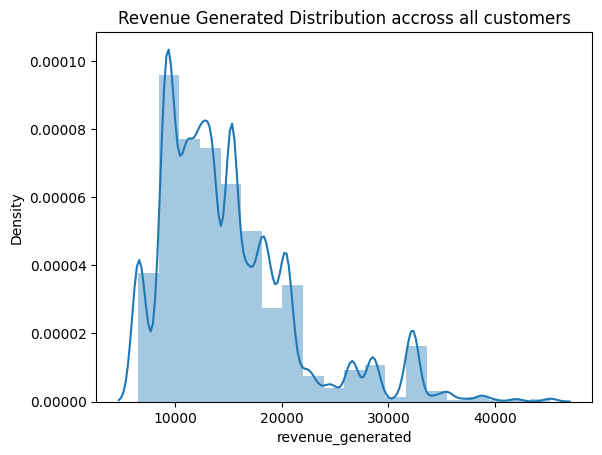

In [ ]:

sns.distplot(df['revenue_generated'], kde=True, bins=20)
plt.title('Revenue Generated Distribution accross all customers')
plt.show()

### **Insights from above:**
overall above curve is right skewed

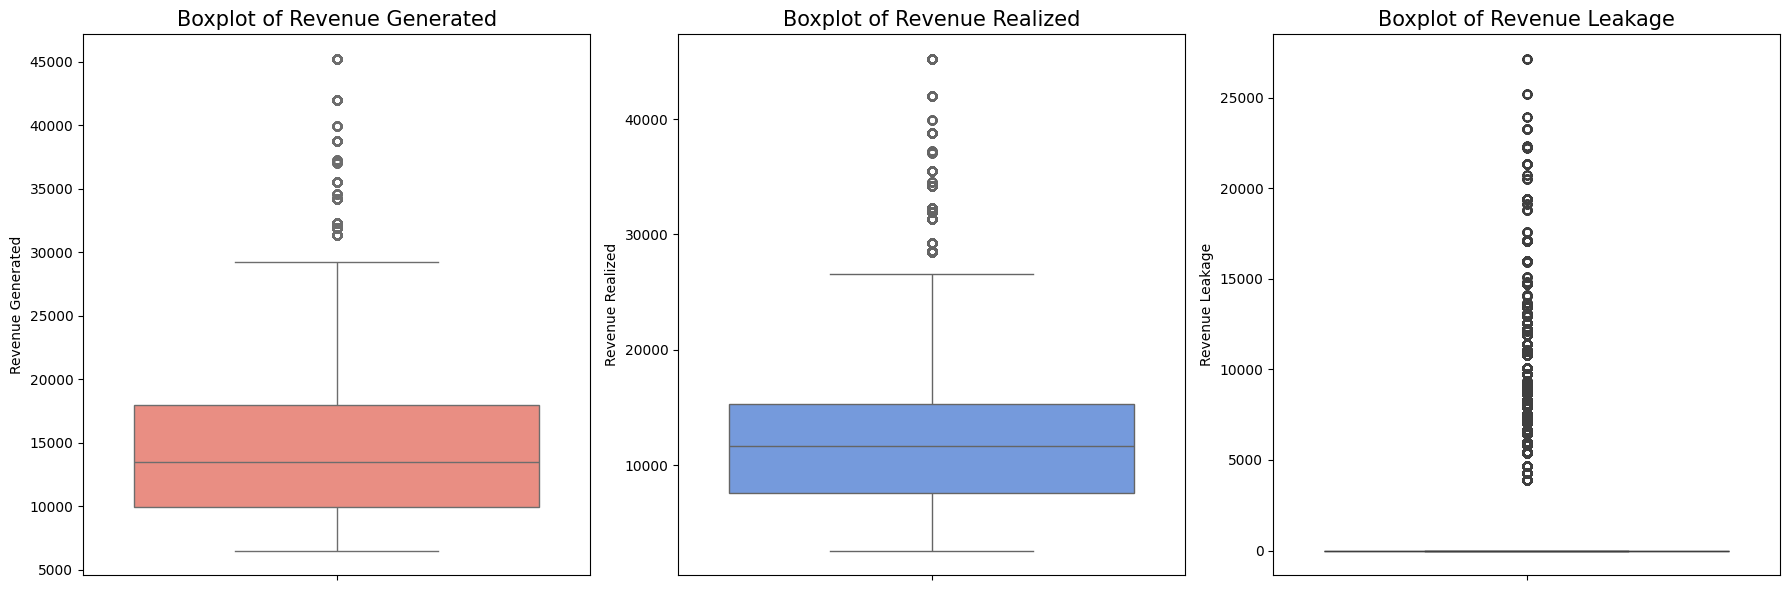

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(df['revenue_generated'], color = 'salmon')
plt.ylabel("Revenue Generated")
plt.title('Boxplot of Revenue Generated', fontsize=15)

plt.subplot(1, 3, 2)
sns.boxplot(df['revenue_realized'], color='cornflowerblue')
plt.ylabel("Revenue Realized")
plt.title('Boxplot of Revenue Realized',fontsize=15)

plt.subplot(1, 3, 3)
sns.boxplot(df['revenue_leakage'])
plt.ylabel("Revenue Leakage")
plt.title('Boxplot of Revenue Leakage',fontsize=15)

plt.tight_layout()
plt.show()

##**Insights from above**
###**📦 1. Revenue Generated (Left plot)**
- Most bookings generate between ₹9,900 to ₹18,000.

- There are some bookings that generate much higher revenue — above ₹30,000, even touching ₹45,220 (max value). These are outliers (rare but very high-paying bookings).

👉 suggests:: most rooms are priced in a standard range, but some luxury or longer bookings bring big money.

###**💸2. Revenue Realized (Middle plot)**
- Realized revenue is usually lower than generated revenue — as expected.
             
- Similar spread to generated, but slightly shifted down.

👉 Suggests: not all bookings deliver full value — some loss happens (maybe due to cancellations or discounts).

###**📉 3. Revenue Leakage (Right plot)**
- Most bookings have low or zero leakage, mean is 0, but:

- Some bookings lose ₹10,000 to ₹25,000+, which is significant.

👉 A long "tail" of outliers shows some bookings leak a lot of money

##  **2.2📈 Booking Trends (Weekday vs Weekend) – Successful Bookings Lineplot**

As all the checked out are successfull bookings so We have filtered out the successfull booking `df[df['booking_status'] == 'Checked Out']` with this and then grouped by with it's total successfull bookings.

This lineplot shows the trend of **successful bookings (Checked Out only)** over time, separated by `day_type` (weekday vs weekend):




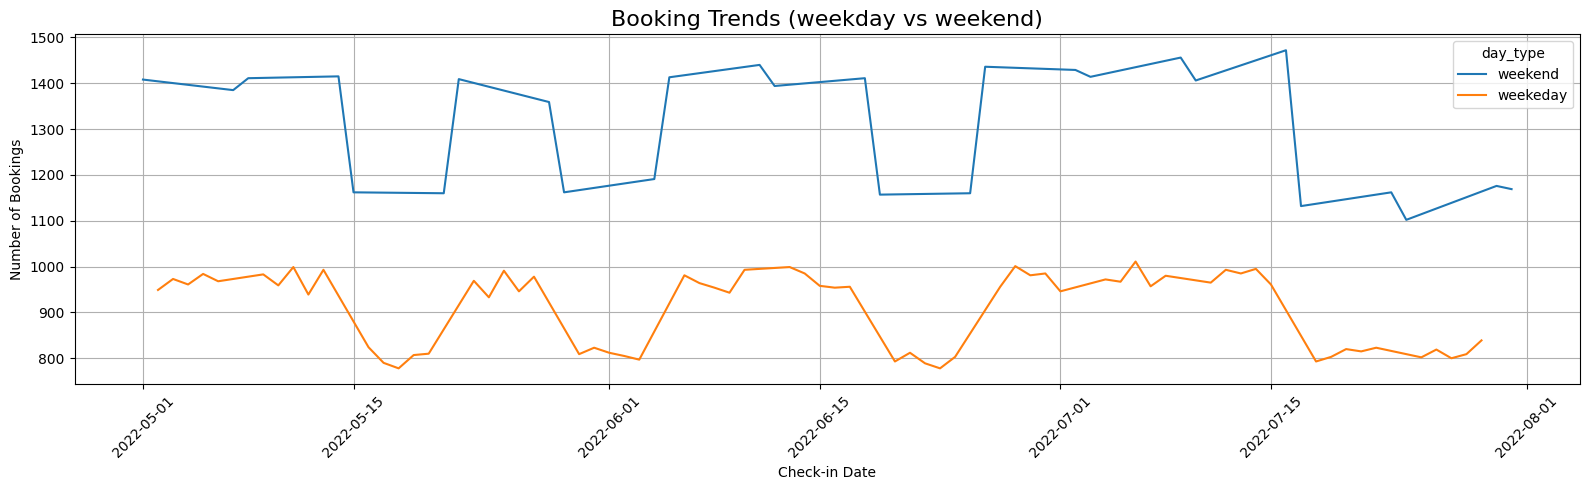

In [ ]:
#@title Filter out only successful bookings and Line Plot

# Count bookings per day
daily_bookings = df[df['booking_status'] == 'Checked Out'].groupby(['check_in_date','day_type']).size().reset_index(name='num_bookings')


plt.figure(figsize=(16, 5))
sns.lineplot(data=daily_bookings, x='check_in_date', y='num_bookings', hue='day_type')
plt.title('Booking Trends (weekday vs weekend)', fontsize=16)
plt.xlabel('Check-in Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### **🔍 Insights from above:**
- **Weekend bookings** are consistently **higher than weekday bookings** across most of the timeline.
- There are some drops in both weekday and weekend bookings regularly, possibly in mid months.
- The pattern suggests that guests **prefer weekend stays**, likely for leisure travel.
- Business opportunities: **weekends are stronger performers**, so **weekday upsell strategies** may help balance the load.
- **Hotels can try special offers for weekdays** to attract more guests.




## **2.3📊 Bookings: Weekday vs Weekend with Booking Status Breakdown**

This bar chart compares total counts of `day_type` and breaks them into `booking_status` categories:  
- **Checked Out** (successful bookings)  
- **Cancelled**  
- **No Show**




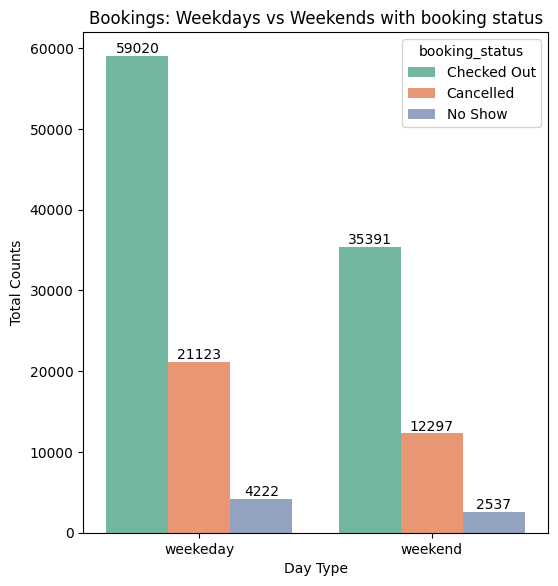

In [ ]:
plt.figure(figsize=(6,6.5))

ax = sns.countplot(data=df, x='day_type',order = ['weekeday','weekend'],hue='booking_status', palette='Set2')

# Annotate each bar with count
for container in ax.containers: # mentioning the total counts at the top
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Bookings: Weekdays vs Weekends with booking status')
plt.xlabel('Day Type')
plt.ylabel('Total Counts')
plt.show()

### **🔍 Insights from above:**
- **Weekdays have more total bookings** (over 84k) compared to weekends (50k), but they also show:
  - Higher absolute numbers of **cancellations (21,123)** and **no-shows (4,222)**.
- Even though weekends have fewer total bookings, they have a **lower cancellation and no-show rate**.
- This highlights a **revenue risk on weekdays** due to **higher booking instability**.
- Strategic idea: Consider **strict policies or incentives for weekday guests** to reduce last-minute losses.

********************************************

## Observe one thing:

 **Why Weekend Line Is Higher Than Weekday Line in Lineplot? but in countplot  weekend are lower in count❓👀**

- **Countplot** shows more total booking status on **weekdays** because there are more **weekdays.**

- **Lineplot** shows higher booking per **weekend day**, even though there are **fewer weekends.**
- in Lineplot

 - Weekdays → Many days with ~900-950 bookings

 - Weekends → Fewer days, but each with ~1300-1400 bookings

## **2.4📊Room Type Trend**

This bar chart shows how many times each type of room was booked successfully (Checked Out).

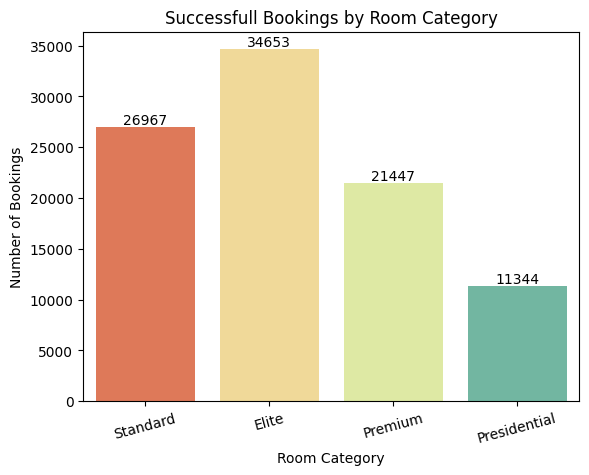

In [ ]:

# Plot number of successfull bookings by room type

ax = sns.countplot(data=df[df['booking_status']=='Checked Out'], x='room_category', palette='Spectral')

for container in ax.containers: # mentioning the total no. of booking at the top
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Successfull Bookings by Room Category')
plt.xlabel('Room Category')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=15)
plt.show()


### **🔍 Insights from above:**
- **Elite rooms** were booked the most (34,653). This means many people like this room type.
- **Standard rooms** also had a lot of bookings (26,967). These are likely more affordable.
- **Premium rooms** had fewer bookings than Standard and Elite.
- **Presidential rooms** were booked the least (11,344). These are usually the most expensive, so not many people choose them.

### 💡 What hotels can do ?
- Hotels should focus more on **Elite and Standard rooms** because these are the most popular.
- **Presidential rooms** may need **discounts or special offers** to attract more guests.
- **Premium rooms** may need **better promotion or pricing** to increase bookings.
---


## **📊2.4 Booking Platform vs Room Category vs Bookings**

We plotted a **grouped bar chart** to visualize the number of **successful bookings** for each **room category** across **booking platforms**.

#### ✅ What We Did:
- Grouped the data by `booking_platform` and `room_category`
- Aggregated the total number of successful bookings using `count()`
- Visualized using a **grouped bar chart** with annotations for clarity


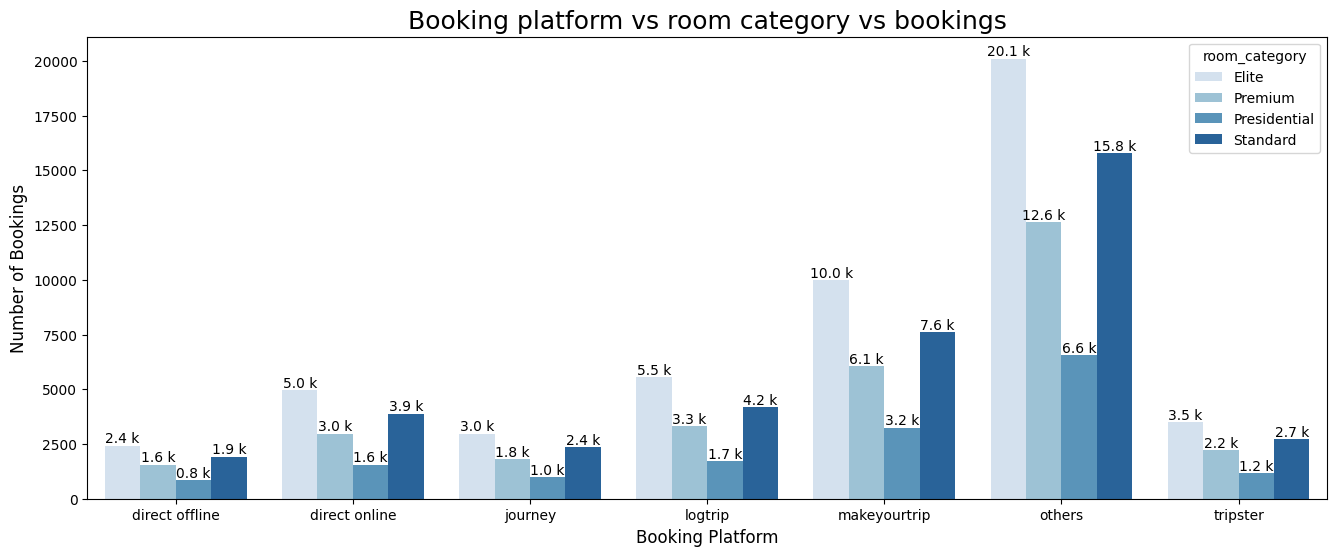

In [ ]:
# bookings by Booking platform vs room category
platform_room_cnt = df.groupby(['booking_platform','room_category'])["booking_id"].count().reset_index().rename(columns={"booking_id":"booking_count"})
platform_room_cnt

plt.figure(figsize=(16, 6))
ax = sns.barplot(data=platform_room_cnt, x='booking_platform', y='booking_count', hue='room_category', palette='Blues')

for container in ax.containers:
    labels = [f'{v.get_height()/1000:.1f} k' for v in container]
    ax.bar_label(container,labels=labels, label_type='edge', fontsize=10)

plt.title('Booking platform vs room category vs bookings', fontsize=18)
plt.xlabel('Booking Platform', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.show()

### 📌 **Insight from above:**
- "Others" platform dominates across all categories, especially for **Elite (20.1k)** and **Standard (15.8k)** rooms.
- **Makemyourtrip** is another strong performer, especially for **Elite (10k)** and **Premium (6.1k)** bookings.
- **Tripster** and **journey** platforms show lower bookings overall, particularly in **Presidential** category.
- This analysis indicates that high-end rooms (like Presidential) see less traction across platforms and may need **targeted marketing** or to improve utilization.

---

## **2.5 💹Seasonal occupancy and revenue correlation**
## 🔗 Correlation Heatmap Between Revenue, Guests, and Categorical Features

In this section, we want to see if there is any strong **relationship (correlation)** between:
- Number of guests
- Revenue realized
- Revenue leakage
- And some **categorical columns** like booking status, room type, platform, and day type

Since correlation works only on numbers, we first **converted the categorical columns into numbers** using `OrdinalEncoder`.

Then we used a **clustermap** to visualize the correlation between all these columns.


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
Oe = OrdinalEncoder()

# Selecting numeric columns first
corr = df[['no_guests', 'revenue_realized','revenue_leakage','week no']]

# Encoding categorical columns so we can include them in correlation
corr_encod = Oe.fit_transform(df[['booking_status','booking_platform','room_category','day_type']])

# Converting to DataFrame with same column names
corr_encod = pd.DataFrame(corr_encod, columns=['booking_status','booking_platform','room_category','day_type'])

#  Combining numeric and encoded categorical data
corr = pd.concat([corr,corr_encod], axis=1)
corr

,no_guests,revenue_realized,revenue_leakage,week no,booking_status,booking_platform,room_category,day_type
0,3,10010,0,19,1.0,1.0,3.0,1.0
1,2,3640,5460,19,0.0,5.0,3.0,1.0
2,2,9100,0,19,1.0,3.0,3.0,1.0
3,2,3640,5460,19,0.0,5.0,3.0,1.0
4,4,10920,0,19,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
134585,1,32300,0,32,1.0,4.0,2.0,1.0
134586,4,38760,0,32,1.0,3.0,2.0,1.0
134587,1,12920,19380,32,0.0,6.0,2.0,1.0
134588,2,32300,0,32,1.0,3.0,2.0,1.0


<Figure size 800x600 with 0 Axes>

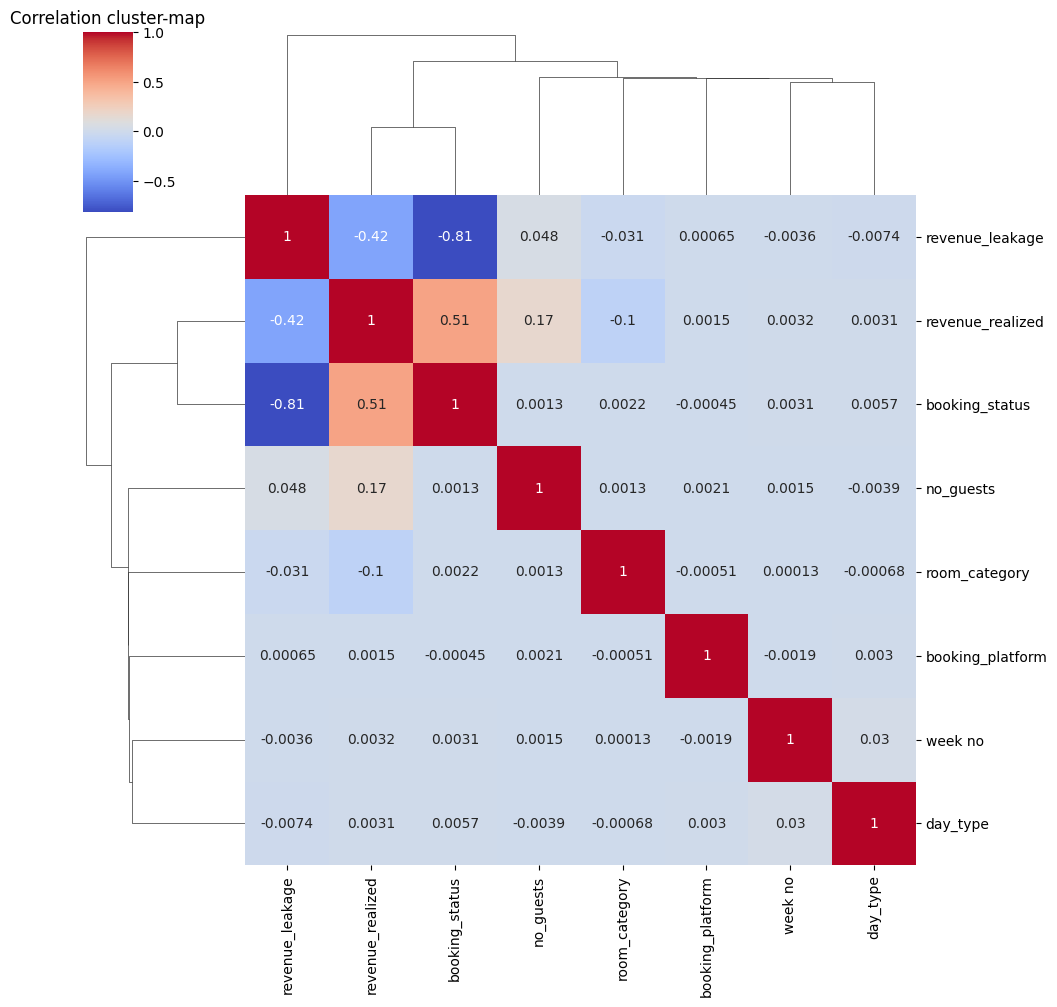

In [ ]:
corr_matrix = corr.corr()

plt.figure(figsize=(8, 6) )

# Plotting the clustermap
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation cluster-map')
plt.xticks(rotation = 0)
plt.show()

### see in the color

- *Dark red = strong positive correlation* (both values increase together)
- *Dark blue = strong negative correlation* (one goes up, the other goes down)
- *White/light colors = no strong connection*

### **📌 Insights from above:**

- **`revenue_realized` and `booking_status`** have a **positive correlation** (+0.51).  
  → This means that when bookings are marked as "Checked Out", revenue usually goes up.

- **`revenue_leakage` and `booking_status`** have a **strong negative correlation** (-0.81).  
  → So, when bookings are cancelled or not completed, hotels lose more money.

- **`revenue_leakage` and `revenue_realized`** also have a **negative relationship** (-0.42).  
  → This makes sense — when actual revenue is low, leakage tends to be higher.
             
-  `room_category`, `booking_platform`, `day_type`, and `no_guests` show **very weak or no clear correlation** with revenue or leakage.  
  → These features may affect results indirectly, but not strongly

### 💡 What hotels can do?
- Focus on reducing **booking cancellations**, since they directly increase revenue leakage.
- Track and monitor **booking status** more closely as it is highly related to both revenue and loss.




##**2.6 📊 Occupancy Over Time by Day Type (Line Plot)**
####this section, we analyzed how guest occupancy varies over time based on the type of day — whether it's a Weekday or Weekend.
                                                
**🔍 Step 1: Filter & Group the Data**       
We first filtered our dataset to include only the bookings where guests have already checked out (means successfull bookings). After that, we grouped the data by:

- `check_in_date`: The date when guests checked in.

- `day_type`: Whether that date is a Weekday or Weekend.

**📈 Step 2: Line Plot**
                                
Now, we plotted this grouped data using a line plot. The goal is to visualize how guest counts change over time, and whether weekends have **higher or lower** occupancy than weekdays.

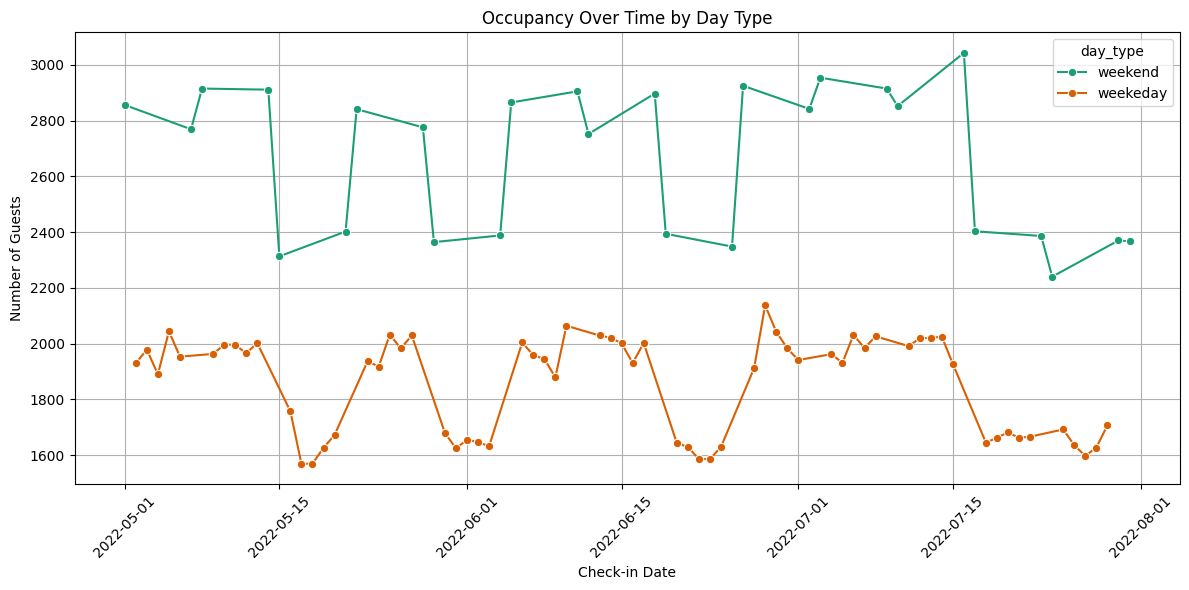

,check_in_date,day_type,no_guests,revenue_realized
0,2022-05-01,weekend,2856,14774.364347
1,2022-05-02,weekeday,1930,14800.584826
2,2022-05-03,weekeday,1978,14907.266187
3,2022-05-04,weekeday,1890,14830.057232
4,2022-05-05,weekeday,2044,14938.460366
...,...,...,...,...
87,2022-07-27,weekeday,1597,14828.406250
88,2022-07-28,weekeday,1627,14844.487021
89,2022-07-29,weekeday,1707,14801.877235
90,2022-07-30,weekend,2370,14857.257653


In [ ]:
#Filter & Group the Data, based on that grouping, taking total guests and avg revenue realized
guest_occ_rev = df[df['booking_status'] == 'Checked Out'].groupby(['check_in_date', 'day_type']).agg({'no_guests':'sum','revenue_realized':'mean'}).reset_index()

# Line Plot by Occupancy Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=guest_occ_rev, x='check_in_date', y='no_guests', hue='day_type', marker='o', palette='Dark2')
plt.title('Occupancy Over Time by Day Type')
plt.xlabel('Check-in Date')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

guest_occ_rev

### **🔍 Insights from above:**
- **More people** stay on **weekends** compared to weekdays almost every time.
- Weekends are always above the weekday line, which means weekends are more popular.
- There are **some sudden drops** in both lines (for example around mid-May, June, and July), which might be due to:
  - Off-season
  - Fewer rooms available
  - School exams, extreme summer or weather issue
- The number of guests is **very stable on weekends**, showing good demand every week.

### 💡 What hotels can do?
- Hotels should **focus on weekend special offers or increase pricing slightly**, because demand is already high.
- For weekdays, hotels can try:  
  - Discounts
  - Combo packages
  - Targeted marketing for business travelers

---

## **🛏️ Occupancy % Over Time by Room Category**

This line chart shows the **average occupancy percentage** of each room type over time.  
We used the `fact_aggregated_bookings` dataset to calculate how full each room category was on different dates.

The room categories are:  

- Elite  
- Premium
- Presidential
- Standard  

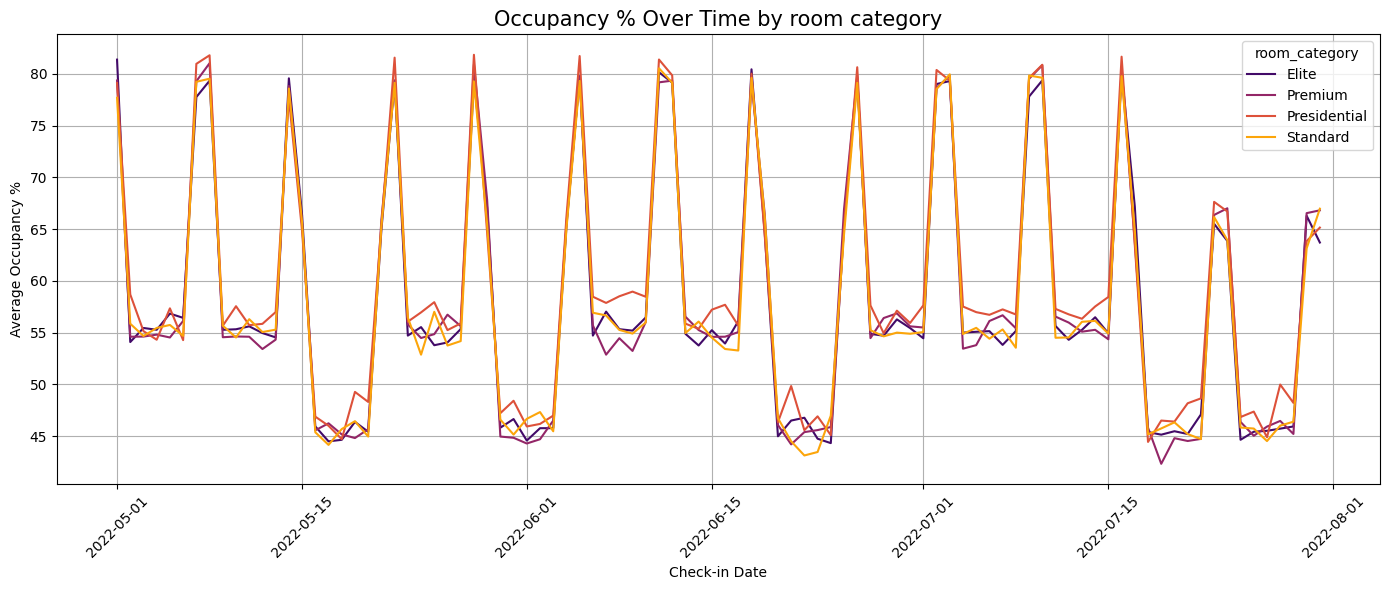

In [ ]:
daily_occupancy = fact_agg_bookings.groupby(['check_in_date', 'room_category'])['occupancy_pct'].mean().reset_index()

# Plot the lineplot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_occupancy, x='check_in_date', y='occupancy_pct', hue='room_category', palette='inferno')
plt.title('Occupancy % Over Time by room category', fontsize=15)
plt.xlabel('Check-in Date')
plt.ylabel('Average Occupancy %')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### **🔍 Insights from above:**
- All room types show **spikes every weekend**, where occupancy reaches around **80% or more**.
- On weekdays, the occupancy drops to around **55% or lower** for most rooms.
- **Standard and Suite rooms** often reach the highest peaks, especially during busy weekends.
- **mid-may, starting-june, end-june** and **mid to end july** we can see **drastic occupancy level fall** (< 50%) more than normal falling.
-In july even last 2 weekend occupancy %age also fall


### 💡 What hotels can do?
- allmost all **rooms are high in demand on weekends**, so hotels can increase their price or bundle them with premium services on weekend.

- Weekday strategies can include discounts, loyalty rewards, or business traveler packages.

---


## **2.7 👥 City and category wise revenue earned**
 based on **city** and **category** pie plot of revenue realized.
 Checking which city is giving more avg revenue with successfull bookings by category

In [ ]:
# checking which city is giving more avg revenue with successfull bookings by category
rev_by_city_cat= df[df['booking_status'] == 'Checked Out'].groupby(['city','category'])['revenue_realized'].sum().reset_index()
rev_by_city_cat

,city,category,revenue_realized
0,Bangalore,Business,123357375
1,Bangalore,Luxury,222419025
2,Delhi,Business,119001820
3,Delhi,Luxury,123876690
4,Hyderabad,Business,87495450
5,Hyderabad,Luxury,181112750
6,Mumbai,Business,211221175
7,Mumbai,Luxury,340629680


We created a **nested pie chart (donut plot)**:
- The **outer circle** shows **how much total revenue** each city earned.
- The **inner circle** shows how that **revenue** is divided between **Business** and **Luxury** hotel categories inside each city.
- We also showed the **percentage values** for both city totals and category splits.

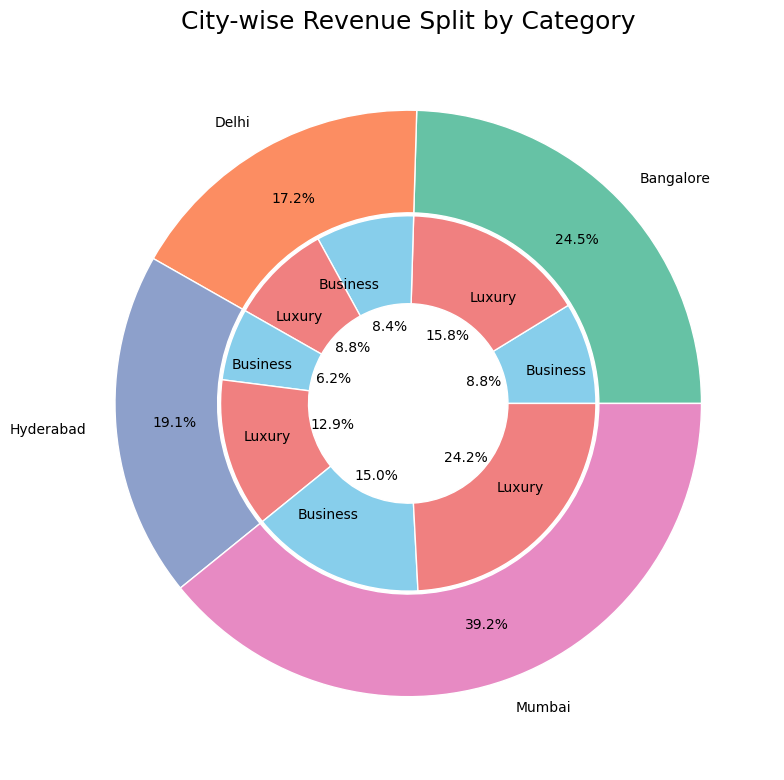

In [ ]:
# Prepare data
cities = rev_by_city_cat['city'].unique()
city_totals = rev_by_city_cat.groupby('city')['revenue_realized'].sum()

# Inner ring: split by category inside each city
inner_sizes = rev_by_city_cat['revenue_realized']
inner_labels = rev_by_city_cat['category']
inner_colors = ['skyblue','lightcoral'] * (len(cities))  # alternate colors for each city

fig, ax = plt.subplots(figsize=(8, 8))

# Outer ring (cities) , main slice
ax.pie(city_totals.values, radius=1,autopct='%2.1f%%',pctdistance=0.8, labels=city_totals.index,colors=sns.color_palette(palette='Set2'), labeldistance=1.1,
       wedgeprops=dict(width=0.35, edgecolor='w'))

# Inner ring (categories per city)
ax.pie(inner_sizes, radius=0.64, labels=inner_labels, autopct='%1.1f%%', pctdistance=0.42, colors=inner_colors, labeldistance=0.65,
       wedgeprops=dict(width=0.3, edgecolor='w'))

# Center
plt.title('City-wise Revenue Split by Category',fontsize=18)
plt.tight_layout()
plt.show()

### **🔍 Insights from above:**

-  **Mumbai** earned the **highest total revenue** (39.2%) among all cities.
-  **Bangalore** comes second with 24.5%, followed by **Hyderabad** (19.1%) and **Delhi** (17.2%).
    
-  In every city, **Luxury hotels earned more** than Business hotels.
- **Mumbai's Luxury** segment alone brings the highest single-category **share (24.2%)** across all cities.
- **Delhi** has a more balanced split between Business and Luxury, but still, Luxury is leading.


### 💡 What hotels can do:
- 🧠 Focus more on **Luxury offerings**, especially in Mumbai and Hyderabad, since they generate the most revenue.
- 💼 Improve or promote **Business hotels** in cities like Delhi and Bangalore where the split is closer.
- **Overall promote** hotels in Delhi and Hyderabad (**focus more on Business hotels**) where  revenue genrated is already low

---

### **2.7 👥 Customer segmentation**

In [ ]:
# if you again want to load the finally perpared dataset from your drive or whatever, do perform this code snippet

# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/final_data_frame.csv')

# df['check_in_date'] = pd.to_datetime(df['check_in_date'])
# df['checkout_date'] = pd.to_datetime(df['checkout_date'])
# df['booking_date'] = pd.to_datetime(df['booking_date'])

## 👥 Customer Segmentation by Spending & Visit Frequency

### ✅ What we did:

We grouped the successfull bookings data by:  `booking_platform` , `property_name` , `city`

For each group, we calculated:
- Total revenue generated (== `revenue_realized`)
- Total number of successful bookings (`total_count`)
- All booking ids of that segment (`segment_booking_ids`)

Then we created two new segments:

1. **Spending Type** (`spend_type`)
   - We used `pd.cut()` divide all groups into 3 parts with bins:
     - 0-25% cutoff spend → `Low`
     - 25%-80% spend → `Medium`
     - Above that → `High`

2. **Visit Frequency Type** (`visit_type`)
   - We used `pd.cut()` with bins:
     - 0-300 bookings → `Rare`
     - 300-mean + std → `Occasional`
     - Above that → `Frequent`

3. **Customer booking ids** (`segment_booking_ids`)
  - All customer details can be accessed through this

---

### 🔍 Now each row tells us:
- How much that group spends (`spend_type`)
- How often they visit or book (`visit_type`)
- Keep track what are those customers (`segment_booking_ids`)




In [ ]:
customer_seg = df[df['booking_status'] == 'Checked Out'].reset_index().groupby(['booking_platform',"property_name","city"]).agg(
                                                                      {'revenue_realized': 'mean','index': 'count'}).reset_index()

customer_seg = customer_seg.rename(columns={'index': 'total_count'})

# Spend segments
customer_seg['spend_type'] = pd.cut(customer_seg['revenue_realized'],
                                      bins=[
                                            0, customer_seg['revenue_realized'].quantile(0.25),
                                            customer_seg['revenue_realized'].quantile(0.8) ,
                                            customer_seg['revenue_realized'].max()+1
                                            ],
                                      labels=['Low', 'Medium', 'High'])

# Frequency segments
customer_seg['visit_type'] = pd.cut(customer_seg['total_count'],
                                    bins=[0, 300, customer_seg.total_count.mean() + customer_seg.total_count.std(), customer_seg.total_count.max()+1],
                                    labels=['Rare', 'Occasional', 'Frequent'])

# keep the total revenue also
customer_seg['total_revenue'] = customer_seg['revenue_realized'] * customer_seg['total_count']

# First, group by the same columns but aggregate booking_id into a list
booking_ids_agg = df[df['booking_status'] == 'Checked Out'].groupby(['booking_platform', "property_name", "city"])['booking_id'].agg(list).reset_index(name='segment_booking_ids')

# Now merge this aggregated booking_ids back to the 'customer_seg' DataFrame
customer_seg = customer_seg.merge(booking_ids_agg, on=['booking_platform', "property_name", "city"], how='left')

#we did this to keep store of booking ids

print(customer_seg.shape)
customer_seg

(168, 9)


,booking_platform,property_name,city,revenue_realized,total_count,spend_type,visit_type,total_revenue,segment_booking_ids
0,direct offline,Atliq Bay,Bangalore,16529.225352,213,Medium,Rare,3520725.0,"[May012219562RT19, May012219562RT113, May01221..."
1,direct offline,Atliq Bay,Delhi,13541.363636,154,Medium,Rare,2085370.0,"[May012216562RT19, May012216562RT22, May012216..."
2,direct offline,Atliq Bay,Hyderabad,11515.760870,276,Low,Rare,3178350.0,"[May012218562RT25, May012218562RT211, May01221..."
3,direct offline,Atliq Bay,Mumbai,18038.162393,117,High,Rare,2110465.0,"[May012217562RT14, May012217562RT110, May02221..."
4,direct offline,Atliq Blu,Bangalore,14715.000000,225,Medium,Rare,3310875.0,"[May012219561RT22, May012219561RT29, May012219..."
...,...,...,...,...,...,...,...,...,...
163,tripster,Atliq Palace,Bangalore,14619.642857,266,Medium,Rare,3888825.0,"[May012219563RT231, May022219563RT14, May02221..."
164,tripster,Atliq Palace,Delhi,14686.411765,340,Medium,Occasional,4993380.0,"[May012216563RT12, May012216563RT130, May01221..."
165,tripster,Atliq Palace,Hyderabad,11110.425532,235,Low,Rare,2610950.0,"[May012218563RT115, May012218563RT25, May01221..."
166,tripster,Atliq Palace,Mumbai,19247.016129,310,High,Occasional,5966575.0,"[May012217563RT231, May012217563RT39, May01221..."


### **NOTE:** in **`customer_seg`** each row shows some **group of customers**  NOT individual customers and each group contains **`total_count`** people in it.

In [ ]:
customer_seg.to_csv('customer_segmentation_with_succ_bookings.csv',index = False)
# creating the final customer sgement dataset of successfull bookings

In [ ]:
# to access next time after runout

# customer_seg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/My_data/customer_segmentation_with_succ_bookings.csv")

## **📊2.8 Booking Platform vs Spend Type - Count Analysis**

### ✅ What we did:
- We used a **barplot** to see how many total bookings (`total_count`) each platform received.
- The bars are grouped by **`spend_type`** → Low, Medium, High.
- This shows us **which booking platforms are bringing which types of spenders**.






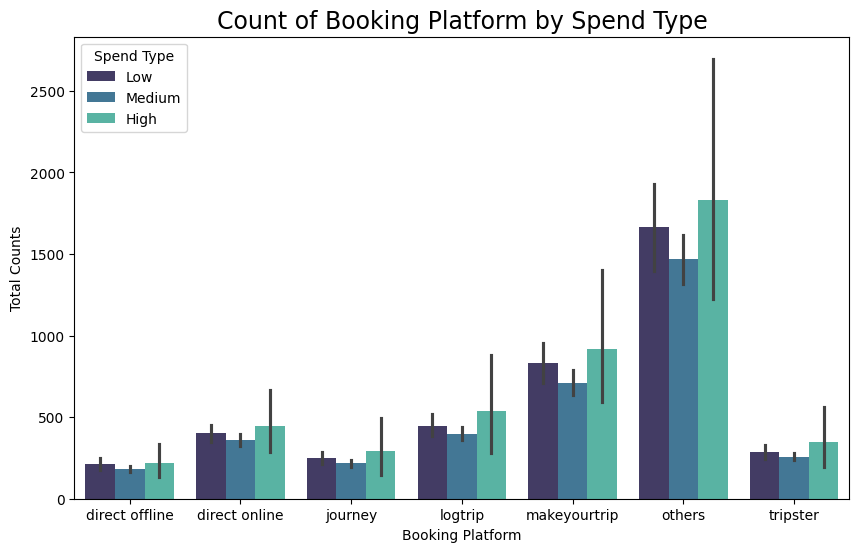

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data= customer_seg, x ='booking_platform', y ='total_count',hue = 'spend_type',palette='mako' )

plt.xlabel("Booking Platform")
plt.ylabel("Total Counts")
plt.title("Count of Booking Platform by Spend Type", fontsize=17)
plt.legend(title='Spend Type', loc='upper left')

plt.show()

### 🔍 **Insights from above:**

- 📍 The **'others'** platform had the **highest number of high spenders** — over 1500 bookings from that group.
-  **makeyourtrip** and **logtrip** also had a **strong count of high spenders**, followed by medium spenders.
- 📉 Platforms like **direct offline** and **journey** have **mostly low and medium spenders**, and fewer total bookings overall.
- **Direct online** and **tripster** shows decent performentce, in both case number **of high spend** is more
- Most platforms show a clear rise from Low → High spend type, especially for bigger platforms.
- in all platform high spend count is more


### 💡 What hotels can do?
- 🎯 Focus on platforms like **makeyourtrip**, **logtrip**, and **others** to attract and retain high spenders.
-  Platforms with more low spenders (like `journey` & `direct offline`) could be used for **promotions or discount campaigns** to boost higher spending.
-  This plot helps decide which platforms are best for different types of customers, and where to apply different strategies.

---

## **📊2.9 Platform-wise Revenue Distribution (pie plot)**

### ✅ What we did:
- We grouped the data by `booking_platform` to find out how much revenue came from each platform.
 - `platform_wise_rev = customer_seg.groupby('booking_platform')['total_revenue'].sum()`
- Then we used a **pie chart** to show which platforms are giving more revenue share.
- The platform that gave the **highest revenue** was slightly **exploded (pulled out)** in the chart to highlight it.





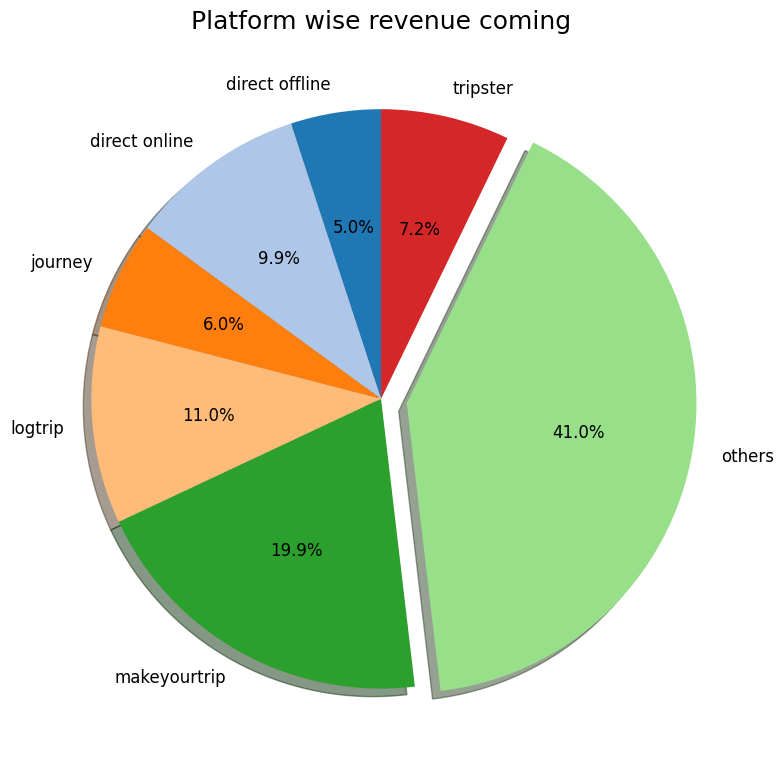

In [ ]:
platform_wise_rev = customer_seg.groupby('booking_platform')['total_revenue'].mean()

# finding highest revenue slice to pull it out (explode)
explode = [0]*len(platform_wise_rev.values)
for i,val in enumerate(platform_wise_rev.values):
  if val == platform_wise_rev.values.max():
    explode[i] = 0.09
    break

fig, ax = plt.subplots(figsize=(8, 8))

# plot the pie chart of revenue platform wise
ax.pie(platform_wise_rev.values, labels=platform_wise_rev.index,
       autopct='%1.1f%%',shadow=True,explode=explode,
       startangle=90,textprops={'fontsize': 12},
       colors=sns.color_palette(palette='tab20'))
# Center

# we have grouped by with total reveue , so it shows customer preference with total value also
plt.title('Platform wise revenue as per customer preference',fontsize=18)


plt.tight_layout()
plt.show()

### **🔍 Insights from above:**
- 📍 The **'others'** platform gave the **highest revenue**, with **41%** share.
-  After that, the next biggest contributor was **makeyourtrip** with **19.9%** revenue share.
- Platforms like **logtrip**, **direct online**, and **tripster** also contributed a decent portion.
- **direct offline** and **journey** gave the **lowest share** at around 5% and 6% respectively.


### 💡 What we can do?
- 🎯 Focus more on platforms like **makeyourtrip**, **logtrip** and **direct online** to increase revenue further. We can **offer couple package** and **family packages** to make it more attractive and demanding.
-  Check if **'others'** includes key partners — maybe break it down more. Also we can **include like platform fees** or of higher **secure booking charge** as demand is already high in **others**.
- 🛠️ Improve or promote low-performing platforms like **direct offline** or **journey**. We can give **discount or No transaction fee & GST, No booking charge** in this lowest share platform

This chart helps us understand which booking sources are most valuable.

---

## 🏨 **2.10 Property-wise Revenue Analysis - Visit Type + Distribution View**

We compared revenue earned by each hotel (`property_name`) using two types of plots:

1. 📊 **Bar Plot** → shows total revenue grouped by visit type (Rare, Occasional, Frequent)


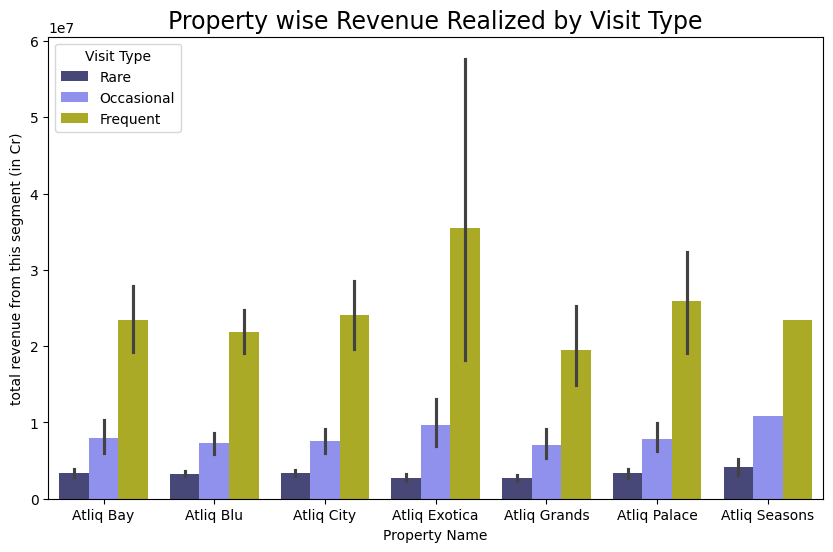

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data= customer_seg, x ='property_name', y ='total_revenue',hue = 'visit_type',palette='gist_stern' )

plt.xlabel("Property Name")
plt.ylabel("total revenue from this segment (in Cr)")
plt.title("Property wise Revenue Realized by Visit Type", fontsize=17)
plt.legend(title='Visit Type', loc='upper left')

plt.show()

2. 🎻 **Violin Plot** → shows revenue distribution for each hotel (spread, peaks, and outliers)

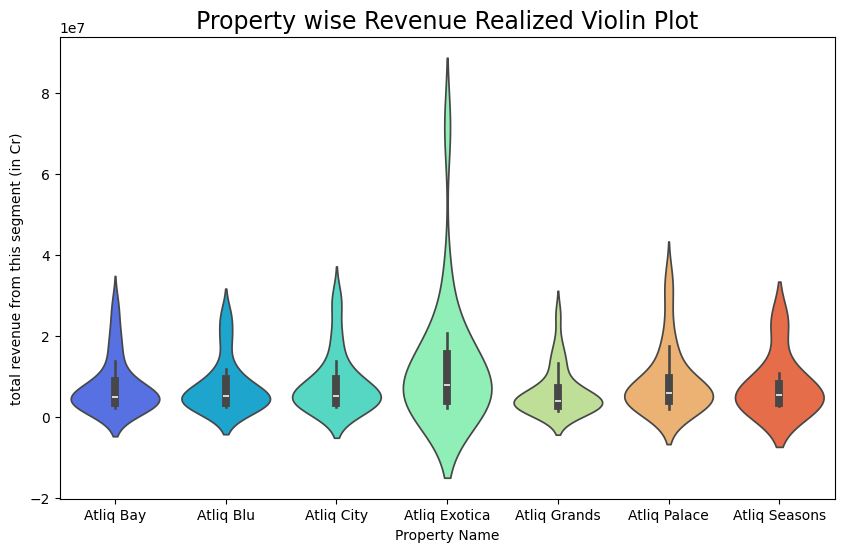

In [ ]:
# plot violin plot revenue vs property
plt.figure(figsize=(10, 6))
sns.violinplot(data= customer_seg, x ='property_name', y ='total_revenue', palette = 'rainbow' )

plt.xlabel("Property Name")
plt.ylabel("total revenue from this segment (in Cr)")
plt.title("Property wise Revenue Realized Violin Plot", fontsize=17)

plt.show()

### **🔍 Insights from Bar Plot:**

- **Frequent visitors bring the highest revenue** to all properties.
-  **Atliq Exotica** is the top-performing property, especially from the **Frequent** segment.
-  Other strong properties include **Atliq Bay**, **Atliq Palace**, and **Atliq Seasons**.
- 📉 Revenue from **Rare** visitors is the lowest in every hotel.

### **🔍 Insights from Violin Plot:**

-  **Atliq Exotica** has the **widest spread** in revenue, showing many high-value bookings and even some **very large outliers** (long tail).
- Most other hotels (like **Atliq Blu**, **City**, and **Grands**) show **tight, smaller distributions**, meaning consistent but smaller revenue per group.
- Wider violins = more **variation** in how much each segment spends at that hotel.
-  The **box inside the violin** shows the **median revenue** — again, Atliq Exotica stands out.


### 💡 What hotels can do?

- Focus on **Atliq Exotica's successful strategies** and apply similar ones in other hotels.
- Target **Frequent visitors** more, as they clearly bring in the most money.
- Reduce dependency on **Rare visitors**, or try to **convert them into Occasional/Frequent** with offers or loyalty rewards.

These two plots together help understand both **how much revenue** is made and **how it's spread** across customers group for each property.

---

## 🔍Finding the customer **segment** that generates **highest revenue**

### ✅ What we did:
- We calculated the **90th percentile** of `revenue_realized`.
- Then filtered all customer segments whose revenue is **greater than that value**.
- These are the **top 10% highest revenue generators** — labeled as **High spenders** and mostly **Frequent visitors**.





In [ ]:

rev_threshold = customer_seg['revenue_realized'].quantile(0.9)

print("Customer segments with revenue above 90th percentile:")
highest_rev_customers = customer_seg[customer_seg['revenue_realized'] > rev_threshold].drop('total_count', axis=1)
highest_rev_customers = highest_rev_customers.sort_values(by='revenue_realized', ascending=False)
highest_rev_customers

Customer segments with revenue above 90th percentile:


,booking_platform,property_name,city,revenue_realized,spend_type,visit_type,total_revenue,segment_booking_ids
143,others,Atliq Seasons,Mumbai,19865.631891,High,Frequent,23421580.0,"[May012217564RT11, May012217564RT13, May012217..."
71,journey,Atliq Seasons,Mumbai,19745.774194,High,Rare,3060595.0,"[May012217564RT26, May012217564RT213, May01221..."
95,logtrip,Atliq Seasons,Mumbai,19625.620690,High,Rare,5691430.0,"[May012217564RT21, May012217564RT215, May01221..."
47,direct online,Atliq Seasons,Mumbai,19584.184783,High,Rare,5405235.0,"[May012217564RT12, May012217564RT28, May012217..."
22,direct offline,Atliq Palace,Mumbai,19296.180556,High,Rare,4167975.0,"[May012217563RT110, May012217563RT27, May01221..."
166,tripster,Atliq Palace,Mumbai,19247.016129,High,Occasional,5966575.0,"[May012217563RT231, May012217563RT39, May01221..."
167,tripster,Atliq Seasons,Mumbai,19153.609756,High,Rare,3926490.0,"[May012217564RT42, May022217564RT34, May022217..."
23,direct offline,Atliq Seasons,Mumbai,18981.250000,High,Rare,2581450.0,"[May012217564RT216, May012217564RT219, May0222..."
94,logtrip,Atliq Palace,Mumbai,18965.432596,High,Occasional,9425820.0,"[May012217563RT121, May012217563RT212, May0122..."
118,makeyourtrip,Atliq Palace,Mumbai,18946.536797,High,Occasional,17506600.0,"[May012217563RT17, May012217563RT19, May012217..."


In [ ]:
print(f"Highest level revenue comes from {(len(highest_rev_customers) / len(customer_seg) )* 100:.2f}% of total customers ")


Highest level revenue comes from 10.12% of total customers 


### calculate these highest level of customer segment

In [ ]:
# calculate these highest level of customer segment
customer_seg.loc[customer_seg['revenue_realized'].max()==customer_seg['revenue_realized'] ,:]

# these customer group of 1179 people are highes revenue generator
#so we can focus on providing highest vip treatment to Atliq Seasons property located at Mumbai, and especially whoever books from others platform
# get access all those customers from segment_booking_ids

,booking_platform,property_name,city,revenue_realized,total_count,spend_type,visit_type,total_revenue,segment_booking_ids
143,others,Atliq Seasons,Mumbai,19865.631891,1179,High,Frequent,23421580.0,"[May012217564RT11, May012217564RT13, May012217..."


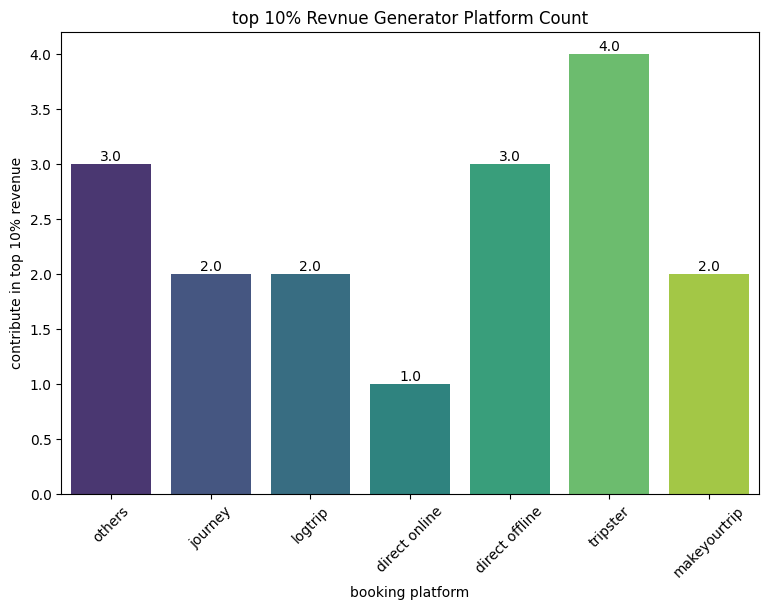

In [ ]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x=highest_rev_customers['booking_platform'], palette='viridis')

for container in ax.containers:
  labels = [v.get_height() for v in container]
  ax.bar_label(container, labels=labels, label_type='edge', fontsize=10)

plt.xlabel('booking platform')
plt.ylabel('contribute in top 10% revenue')
plt.title('top 10% Revnue Generator Platform Count')
plt.xticks(rotation=45)

plt.show()


### **🔍 Insights from above:**

- 💸 Only **10% of customer segments** bring in the **highest share of revenue**.
-  All these customers are both **High spenders** and **Frequent visitors** — showing strong loyalty and value.
-  Top contributing properties include:
  - **Atliq Seasons (Mumbai)**

- Most of these bookings come through **"tripster" platform**, followed by **direct offline**. and **others**.
- So though **direct offine** brings less total revenue but contributes at **2nd highest revenue generator** among top 10%


### 💡 What Hotels Can Do:

- 🎯 **Target these top customers** with exclusive loyalty programs, free upgrades, or VIP services.
- **Focus marketing** efforts on platforms like **direct offline**, **tripster**, and **others** where high-value bookings are coming from.
-  Replicate what's working at **Atliq Seasons** to improve other properties.

These 10% are **gold customers** — keep them engaged to maintain high revenue flow! Give them some VIP treatment for free by introducing something like **loyalty card**.

____


## **📊2.11 Performance Metrics: Weekday vs Weekend**

### ✅ What we did:

- Took our final `KPI` dataframe and grouped it by `day_type` (weekday or weekend).
- Calculated the **average** of these 4 key metrics:
  - `revenue_realized`
  - `RevPAR` (Revenue per Available Room)
  - `ADR` (Average Daily Rate)
  - `occupancy_pct` (Occupancy %)
- Plotted all 4 metrics as **side-by-side bar charts** to compare weekdays vs weekends.

In [ ]:

weekly_data = KPI.groupby("day_type").agg({'revenue_realized':'sum',
                                                'RevPAR':'mean',
                                                'ADR':'mean',
                                                'occupancy_pct':'mean'
                                                }).round(2)
weekly_data

,revenue_realized,RevPAR,ADR,occupancy_pct
day_type,,,,
weekeday,1069703782,7635.32,14669.01,51.81
weekend,639067447,10908.78,14756.29,73.96


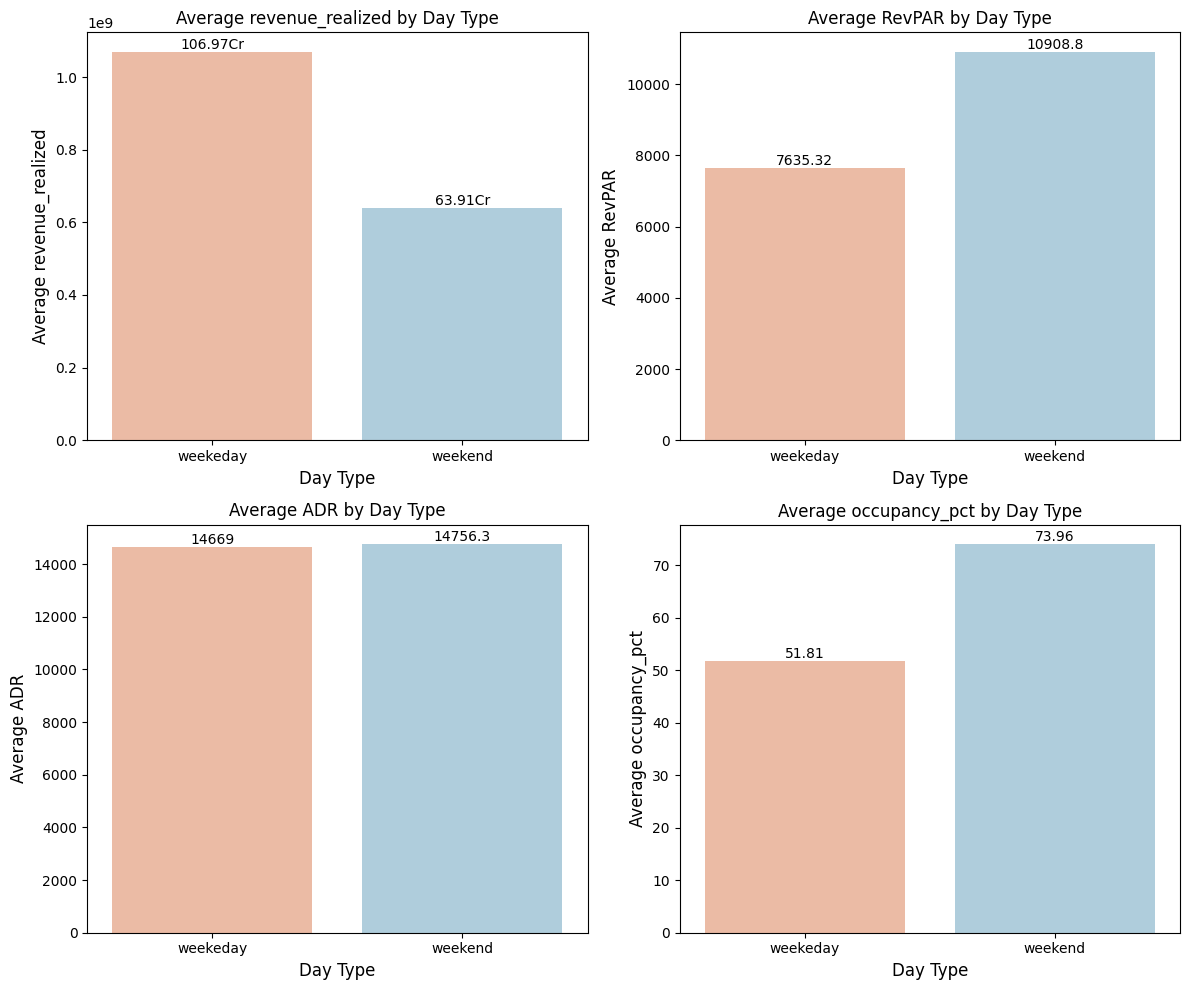

In [ ]:
if isinstance(weekly_data, pd.DataFrame):
    columns_to_plot = ['revenue_realized', 'RevPAR', 'ADR', 'occupancy_pct']

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for i, col in enumerate(columns_to_plot):

        sns.barplot(x=weekly_data.index, y=weekly_data[col], ax=axes[i], palette='RdBu')
        axes[i].set_title(f'Average {col} by Day Type')
        axes[i].set_xlabel('Day Type',fontsize=12)
        axes[i].set_ylabel(f'Average {col}',fontsize=12)
        axes[i].tick_params(axis='x', rotation=0)

        # Add labels to the bars
        for container in axes[i].containers:
            if i==0:
              labels = [f'{v.get_height()/10000000:.2f}Cr' for v in container]
              axes[i].bar_label(container, labels=labels, label_type='edge', fontsize=10)
            else:
              axes[i].bar_label(container, label_type='edge', fontsize=10)


    plt.tight_layout()
    plt.show()
else:
    print("weekly_data is not a pandas DataFrame.")

### 📈 Insights from above:

-  **Weekday revenue** (₹106Cr) is much higher than weekend revenue (₹64Cr) → It's maybe because weekdays are more
-  **RevPAR** is higher on weekends (₹10.9K) than weekdays (₹7.6K) → better room earnings on weekends.
-  **ADR** is almost same on both days (~₹14.7K) → pricing is consistent, but weekend rooms sell more.
-  **Occupancy %** jumps from **51.8% (weekday)** to **73.9% (weekend)** → most rooms fill on weekends.

---

# **Step 3. Root Cause Analysis**
# 🕵️‍♂️Let's Identify why revenue is leaking:

---

In [ ]:
# if you again want to load the finally perpared dataset from your drive or whatever, do perform this code snippet

# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/My_data/final_data_frame.csv')

# df['check_in_date'] = pd.to_datetime(df['check_in_date'])
# df['checkout_date'] = pd.to_datetime(df['checkout_date'])
# df['booking_date'] = pd.to_datetime(df['booking_date'])



In [ ]:

# if you again want to load the KPI data

# KPI = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/My_data/KPI_data.csv")

# KPI['check_in_date'] = pd.to_datetime(KPI['check_in_date'])

## **🛏️3.1 Room Category Performance Analysis (Occupancy %)**

### ✅ What we did:
- We grouped room data from `fact_agg_bookings` by `room_category`.
- Calculated:
  - Total `successful_bookings`
  - Total `capacity`
  - Then calculated `occupancy %` for each room category.






In [ ]:
grp = fact_agg_bookings.groupby([['room_category']]).agg( {'successful_bookings': 'sum','capacity': 'sum'}).reset_index()

grp['grouped_occ_pct'] = grp['successful_bookings'] / grp['capacity'] * 100
grp.sort_values(by='grouped_occ_pct',ascending=True, inplace=True)
grp

,room_category,successful_bookings,capacity,grouped_occ_pct
1,Premium,30566,53084,57.580439
0,Elite,49505,85928,57.612187
3,Standard,38446,66424,57.879682
2,Presidential,16073,27140,59.222550


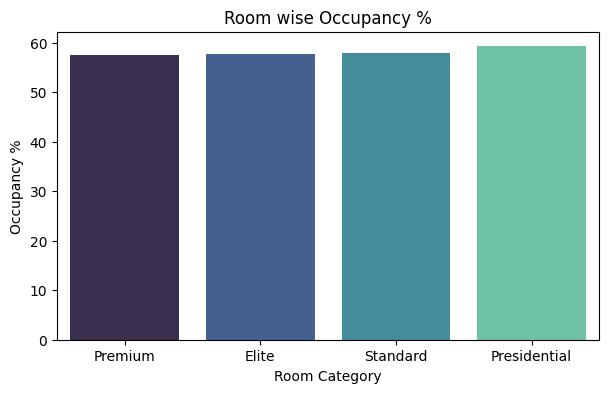

In [ ]:
# plot a bar chart of  room wise occupy percentage

plt.figure(figsize=(7,4))

sns.barplot(data=grp, x='room_category', y='grouped_occ_pct', palette='mako')
plt.xlabel('Room Category')
plt.ylabel('Occupancy %')
plt.title('Room wise Occupancy %')
plt.show()



### **🔍 Insights from above:**

- All room types have **very similar occupancy rates**, mostly around **57–59%**.
- The **Presidential** room has slightly higher occupancy (**59.22%**), but not a big difference.
- This shows that **no specific room category is underperforming or overperforming drastically** for all successfull bookings.



### 💡 What we can say:

- Room demand across categories is **well balanced**.
- No room category needs immediate corrective action based on occupancy % alone.

---


## **3.2.1 Room Category Performance: (Total vs Successful Bookings)**

###  What we did:

#### 📌 Data Prep:
- Filtered only **successful bookings** where `booking_status = Checked Out`.
- Grouped by `room_category` to calculate:
  - Total successful bookings
  - Total revenue realized
  - Total revenue leakage
  - Total guests
- Also calculated:
  - **Total bookings** (all statuses)
  - **Success rate** = (successful / total) × 100
  - **RevPAR** (Revenue Per Available Room) = revenue / successful bookings




In [ ]:
room_grp = df[df['booking_status'] == 'Checked Out'].groupby('room_category').agg({
    'booking_id': 'count',
    'revenue_realized': 'sum',
    'revenue_leakage': 'sum',
    'no_guests': 'sum'
}).reset_index().rename(columns={'booking_id': 'successful_bookings'})

room_grp

,room_category,successful_bookings,revenue_realized,revenue_leakage,no_guests
0,Elite,34653,461430180,0,68263
1,Premium,21447,381040680,0,46723
2,Presidential,11344,311567700,0,23886
3,Standard,26967,255075405,0,53577


In [ ]:
#  Get Total Bookings (All Statuses)
total_bookings = df.groupby('room_category')['booking_id'].count().reset_index().rename(columns={'booking_id': 'total_bookings'})

#Merge to Compare Performance
room_perf = room_grp.merge(total_bookings, on='room_category', how='left')
room_perf['success_booking_rate'] = (room_perf['successful_bookings'] / room_perf['total_bookings']) * 100

# Avg Revenue per room
room_perf['RevPAR'] = np.round(room_perf['revenue_realized'] / room_perf['successful_bookings'],2)

# Diaplaying the room performence data
room_perf

,room_category,successful_bookings,revenue_realized,revenue_leakage,no_guests,total_bookings,success_booking_rate,RevPAR
0,Elite,34653,461430180,0,68263,49505,69.998990,13315.74
1,Premium,21447,381040680,0,46723,30566,70.166198,17766.62
2,Presidential,11344,311567700,0,23886,16073,70.577988,27465.42
3,Standard,26967,255075405,0,53577,38446,70.142538,9458.80



#### **📊 Visualization (Barplot)**
- Created a stacked-style barplot to compare:
- Added booking success % labels above each red bar.



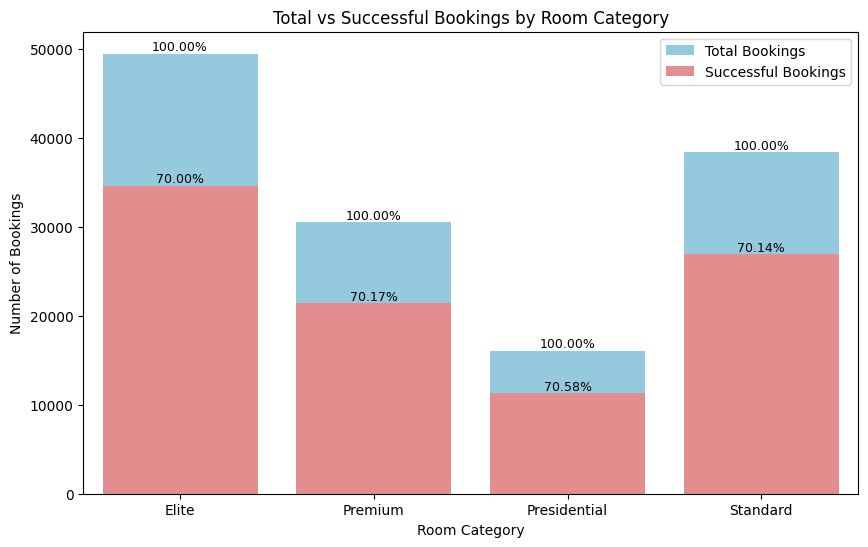

In [ ]:
plt.figure(figsize=(10, 6))

# Plot successful bookings per room category
bar1 = sns.barplot(x='room_category', y='total_bookings', data=room_perf, color='skyblue', label='Total Bookings')

# Plot total bookings per room category on the same axis
bar2 = sns.barplot(x='room_category', y='successful_bookings', data=room_perf, color='lightcoral', label='Successful Bookings')

plt.xlabel('Room Category')
plt.ylabel('Number of Bookings')
plt.title('Total vs Successful Bookings by Room Category')
plt.legend()

# Add annotations for successful booking rate on the successful bookings bars
for container in bar2.containers:
  labels = [f'{v.get_height() / total * 100:.2f}%' for v, total in zip(container, room_perf['total_bookings'])]
  bar2.bar_label(container, labels=labels, label_type='edge', fontsize=9)

plt.show()



### 🔍 **Insights from the Barplot:**

-  All room categories (Elite, Premium, Presidential, Standard) have almost the **same success rate ~70%**.
-  This means cancellation and no-show rates are **evenly distributed** across all room types.
-  **Elite** has the highest total and successful bookings (most popular).
-  **Presidential** has the lowest volume but still matches the **70% success rate** like others.


### 💡 What this means:
- No room type is currently **underperforming** or needs **urgent correction**.
- Hotel has maintained **balanced performance** across **room categories**.

This chart confirms that **room demand is balanced**, and no room is leaking revenue due to poor booking success.

---

## **3.2.2 Room Category Performance: (Total vs RevPAR)**      

###  What we did:

- from **KPI** Grouped by `room_category` to calculate:
  - mean Revenue Per Available Room        


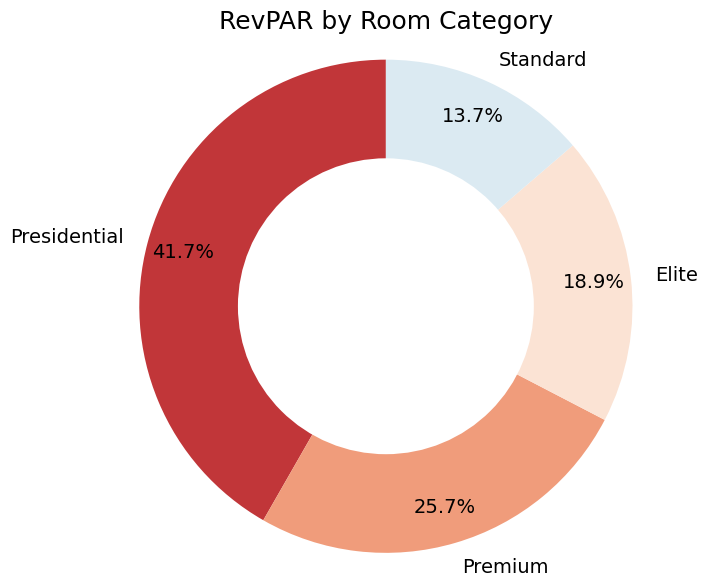

In [ ]:
room_wise_RevPAR = KPI.groupby('room_category')['RevPAR'].mean().sort_values(ascending=False)
# Create the donut plot
plt.figure(figsize=(7, 7))
plt.pie(room_wise_RevPAR, labels=room_wise_RevPAR.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85,textprops={'fontsize': 14}, colors=sns.color_palette('RdBu'))

# Draw a circle in the center to make it a donut
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('RevPAR by Room Category',fontsize=18)
plt.axis('equal')
plt.show()

### **🔍 Insights from Donut chart:**

-  **Presidential rooms** contribute the **highest RevPAR** — around **41.7%** of total.
-  **Premium rooms** come second with **25.7%** of average revenue.
- **Standard rooms** have the **lowest share** of RevPAR — only **13.7%**, despite having many bookings.


### 💡 What this tells us:

- Even though **Standard and Elite** rooms may have more bookings(see in previous bar plot), their **average earning per room is low**.
- **Presidential** rooms, though **fewer in number**, are more **profitable per booking.**
- Hotels can:
  -  Promote Premium and Presidential rooms more aggressively.
  -  Improve pricing strategies for Standard rooms to increase their RevPAR.
  -  Balance room allocation to **maximize profit per room**, not just total bookings.  

This chart helps focus on **quantity** and **quality** of revenue per room.

---

 ## 🔍 Understand how cancellations or no-shows are contributing to revenue leakage.

## 📅 **3.3 Uncsuccessfull Bookings Over the Time**

### ✅ What we did:

- Filtered data to keep only **unsuccessful bookings** (Cancelled and No Show).
- Grouped them by **check-in date** and **booking status**.
- Counted how many cancellations or no-shows happened on each date.
- Plotted a **line chart** to track how these two booking statuses changed over time.

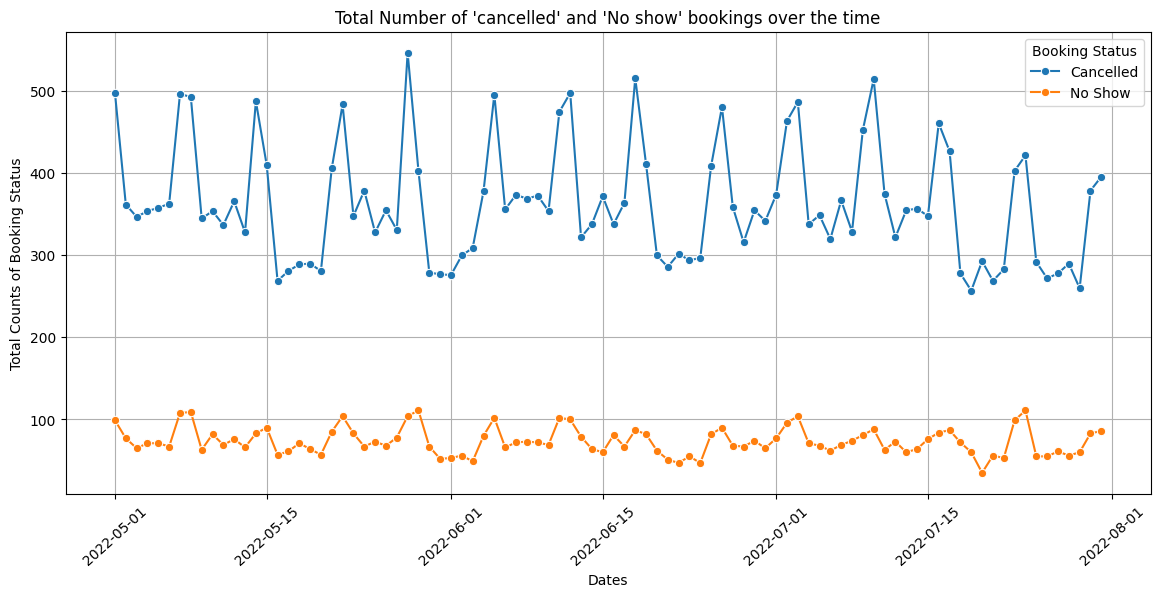

In [ ]:

un_succ_data = df[df['booking_status'] != 'Checked Out']

track_booking_stts = un_succ_data.groupby(['check_in_date', 'booking_status'])['booking_id'].count().rename('Total Count').reset_index()

plt.figure(figsize=(14, 6))

sns.lineplot(data=track_booking_stts, x='check_in_date', y='Total Count', hue='booking_status', marker='o')
plt.xlabel("Dates")
plt.ylabel('Total Counts of Booking Status')
plt.title("Total Number of 'cancelled' and 'No show' bookings over the time")

plt.xticks(rotation=42)
plt.grid()
plt.legend(title='Booking Status')
plt.show()

### 🔍 Insight from above:
- **Cancelled bookings** are consistently **much higher** than **No-shows** throughout the time period.
- No-shows stay relatively stable, while cancellations **spike frequently** on some dates.


Hotels should focus more on **cancellation policies** to reduce leakage.

In [ ]:
int(df[df['booking_status'] != 'Cancelled']['revenue_leakage'].sum() )

# it is 0, means revenue is leaking only because of cancelled bookings

0

In [ ]:
# Filtered out only canceled data  cause revenue is leaking only through cancelled bookings

cancel_data = df[df['booking_status'] == 'Cancelled']

## **3.4 Revenue Leakage from Cancellations by Booking Platform**

### ✅ What we did:

- We filtered the data to only include **Cancelled bookings**.
- Then grouped it by **`booking_platform`** and calculated:
  -  `revenue_leakage` = total money lost due to cancellations
  -  `counts` = number of cancelled bookings
- We added a new column:  
  - `Avg_Rev_leakage` = revenue leakage per cancelled booking
- Sorted the results in **descending order** to see which platform causes **more loss per cancellation**.


In [ ]:
cancel_by_platform = cancel_data.groupby(['booking_platform']).agg(
                                                                   {"revenue_leakage":'sum',
                                                                   "booking_id":'count'}
                                                                    ).rename(columns={'booking_id': 'counts'})

#compute nother column of average revenue leakage per cancelled booking
cancel_by_platform['Avg_Rev_leakage'] = np.round(cancel_by_platform['revenue_leakage'] / cancel_by_platform['counts'],2 )

# arrange the dataset in descending order by 'Avg_Rev_leakage'
cancel_by_platform = cancel_by_platform.sort_values(by='Avg_Rev_leakage',ascending=False)
cancel_by_platform  = cancel_by_platform.reset_index()
cancel_by_platform

,booking_platform,revenue_leakage,counts,Avg_Rev_leakage
0,direct offline,14954922,1654,9041.67
1,makeyourtrip,60667626,6722,9025.23
2,journey,18123381,2009,9021.10
3,tripster,21647709,2407,8993.65
4,logtrip,31924467,3586,8902.53
5,direct online,29743563,3344,8894.61
6,others,121713318,13698,8885.48


#### **📈 Visualization:**
- Line plot showing **Average Revenue Leakage per Cancelled Booking** by platform.
- Values labeled on top of each point for clarity.

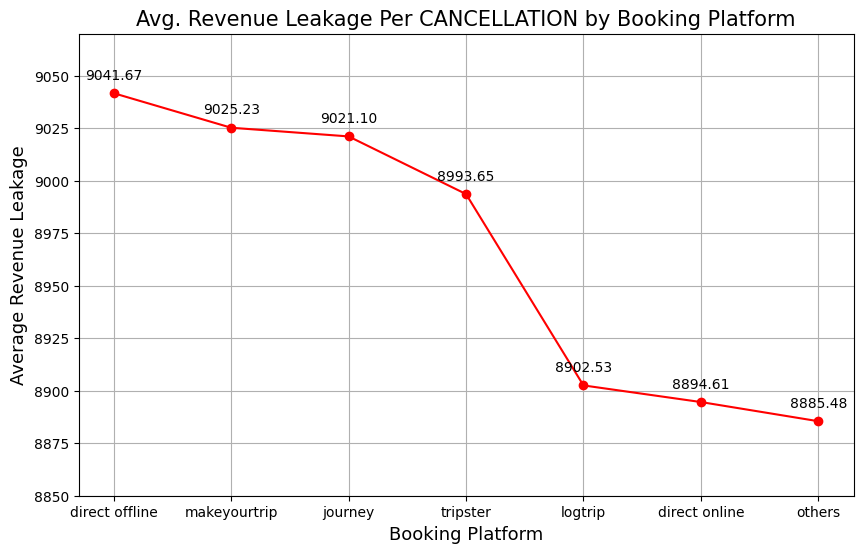

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cancel_by_platform['booking_platform'], cancel_by_platform['Avg_Rev_leakage'], marker='o',color='r' )

# Annotate each point with its value
for i, txt in enumerate(cancel_by_platform['Avg_Rev_leakage']):
    plt.annotate(f'{txt:.2f}',
                (cancel_by_platform.index[i], cancel_by_platform['Avg_Rev_leakage'].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel("Booking Platform",fontsize=13)
plt.ylabel("Average Revenue Leakage",fontsize=13)
plt.title("Avg. Revenue Leakage Per CANCELLATION by Booking Platform",fontsize=15)

plt.ylim(8850, 9070)
plt.grid()
plt.show()

### 🔍 **Insights from the Plot:**

-  **Direct offline** bookings have the **highest average revenue loss** per cancellation — ₹9041.67 per booking.
-  Platforms like **makeyourtrip** and **journey** also show **high avg. leakage** above ₹9000.
-  On the lower side:
  - **others** platform has the **lowest avg leakage** at ₹8885.48
  - **direct online** and **logtrip** also cause relatively **less leakage** per cancellation.
- The difference between highest and lowest is **over ₹150 per cancellation**, which can **add up over time**.


### 💡 What Hotels Can Do:

- 🧾**Review cancellation policies** on platforms like **direct offline**, **makeyourtrip**, and **journey** — as they're **costing more per cancelled guest**.
-  Consider **prepayment or stricter cancellation rules** for these platforms to reduce loss.
- Hotels can also  Offer **Non refundable deal** or **discounts for confirmed bookings** on high-risk platforms.
 -  offer non-refundable deals if the cancellation happens within 72 hours before check-in.
 - If the booking is cancelled between 6 days and 72 hours before check-in, then only 50% refund will be given.
 - ⚠️ In all other cases, some cancellation charges will still apply, especially for bookings made through high-risk platforms.


This chart helps hotels **minimize financial risk** by identifying where **cancelled bookings hurt the most**.

---

## **3.5 Revenue Leakage from Cancellations by Room Category**
### ✅ What we did:
- 🔍 Focused only on cancelled bookings.

- Grouped data by room_category and day_type (weekday/weekend).Then Calculated:

  - `avg_rev_leak` → Average revenue loss per cancellation for each room type on each day type.

  - `counts` → Number of cancellations for that combination.
          
  - `pct_rev_leak` → What percentage of total average leakage each group contributes.

📊 Sorted the table by average leakage in descending order

In [ ]:

cancel_by_room =  cancel_data.groupby(['room_category','day_type']).agg(
                                                            {"revenue_leakage":'mean',
                                                            "booking_id":'count'}
                                                             ).rename(columns={'booking_id': 'counts', 'revenue_leakage':'avg_rev_leak'}).reset_index()

cancel_by_room['avg_rev_leak'] = np.round(cancel_by_room['avg_rev_leak'],2 )

# average revenue leakage (in %age) for each room in each day type
cancel_by_room['pct_rev_leak'] = np.round(cancel_by_room['avg_rev_leak'] / cancel_by_room['avg_rev_leak'].sum() * 100, 2 )

# arrange the dataset in descending order by 'Avg_Rev_leakage'
cancel_by_room = cancel_by_room.sort_values(by='avg_rev_leak',ascending=False).reset_index(drop=True)

cancel_by_room


,room_category,day_type,avg_rev_leak,counts,pct_rev_leak
0,Presidential,weekeday,16565.46,2511,20.31
1,Presidential,weekend,16307.95,1417,19.99
2,Premium,weekeday,10725.50,4786,13.15
3,Premium,weekend,10677.28,2819,13.09
4,Elite,weekeday,7986.55,7795,9.79
5,Elite,weekend,7983.30,4562,9.79
6,Standard,weekeday,5667.47,6031,6.95
7,Standard,weekend,5654.12,3499,6.93


- ✅ **This Bar Plot** → Shows **average revenue loss** for each room category, separated by **weekday vs weekend**.
  -  **Premium and Presidential rooms** have **higher avg leakage**, especially on week day (but day type doesn't varry too much).



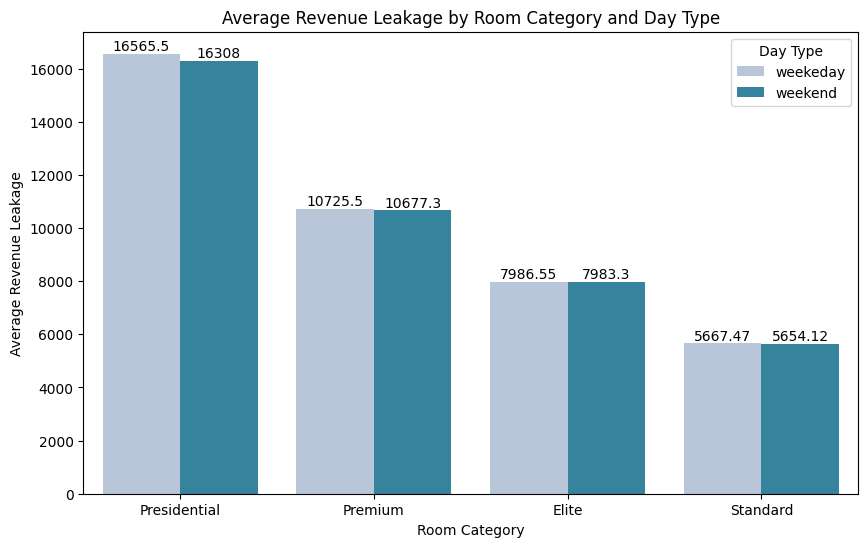

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=cancel_by_room ,x='room_category', y='avg_rev_leak',hue='day_type', palette='PuBuGn')

# annot on top of the bars
for p in ax.containers:
    ax.bar_label(p, label_type='edge')

plt.xlabel('Room Category')
plt.ylabel('Average Revenue Leakage')
plt.title('Average Revenue Leakage by Room Category and Day Type')
plt.legend(title='Day Type')
plt.show()

###  **🔍 Insights from above**

-  **Presidential rooms** have the **highest average revenue leakage** — ₹16.5k on weekdays and ₹16.3k on weekends.
-  **Premium rooms** come next, with ~₹10.7k leakage.
-  **Standard rooms** have the **lowest leakage** (~₹5.6k).
-  Leakage is **slightly higher on weekdays**, but the difference is small.

 This shows that **high-end rooms cause more financial loss per cancellation**, even if the number of cancellations is low.

---

- 📉 **This Count Plot** → Shows **how many cancellations** happened in each room type.
  -  **Standard and Elite rooms** get cancelled more often.
  -  But their average loss per cancellation is lower.

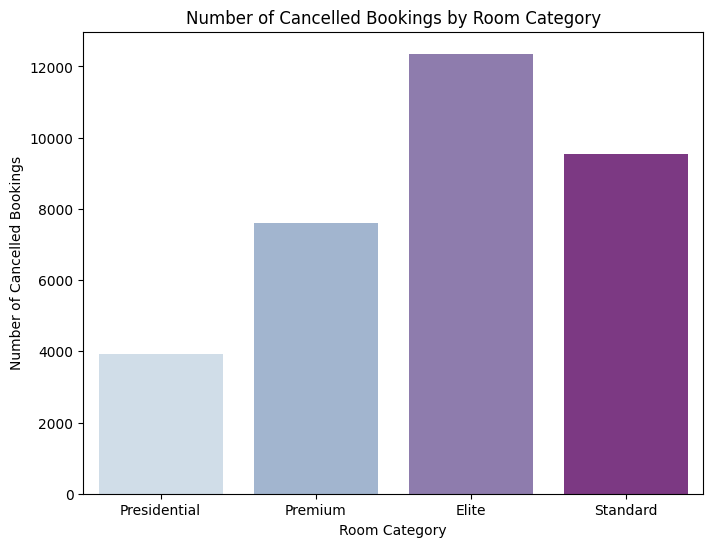

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x = cancel_data['room_category'], palette='BuPu',
              order=['Presidential','Premium','Elite','Standard'])

plt.xlabel('Room Category')
plt.ylabel('Number of Cancelled Bookings')
plt.title('Number of Cancelled Bookings by Room Category')
plt.show()

### **Insights from above**
- ❗**Elite** rooms have the highest number of cancellations (12k+).
- **Standard and Premium** rooms follow.
- 📉 Surprisingly, **Presidential rooms have the lowest cancellations**, even though they leak the most money per cancellation.



### 💡 What this tells us:

- 💸 **Presidential room cancellations are rare but very costly** — these guests are high-value.
-  Hotel should ensure **premium support**, **reminder systems**, and maybe **non-refundable conditions** for Presidential bookings.
-  Meanwhile, **Elite and Standard rooms** are cancelled more often — hotel can investigate if this is due to pricing, overbooking, or guest behavior.
                                      
This 2 charts shows both **how often guests cancel** and **how much it damages** when they do.

---

## **⏳3.6 Impact of Last-Minute Discounts on Revenue Leakage**

### ✅ What we did:

- Focused only on **cancelled bookings** to analyze revenue leakage.
- Calculated **booking gap** = days between booking date and check-in date.
- Labeled each booking as **'Late' or 'Early'** based on a 2-day cutoff.



In [ ]:

cancel_data = df[df['booking_status'] == 'Cancelled']

cancel_data['booking_gap'] = (cancel_data['check_in_date'] - cancel_data['booking_date']).dt.days  # gap in days

# Use np.where for element-wise conditional assignment
cancel_data["booking_gap_stts"] = np.where(cancel_data['booking_gap'] <= 2, 'Late', 'Early')

### **This lineplot shows Average Booking Gap Trend (for Cancelled Bookings)**
-  grouped `cancel_data` by `check_in_date` to get **average booking gap per day**.
- Plotted a **line chart** to show how average gap changed over time.
- Added a **cut-off line** (mean - std) to visually separate:
  - 🟢 **Early Bookings** (above the line)
  - 🔴 **Late Bookings** (below the line)

This helps us see on which dates most cancellations were last-minute.

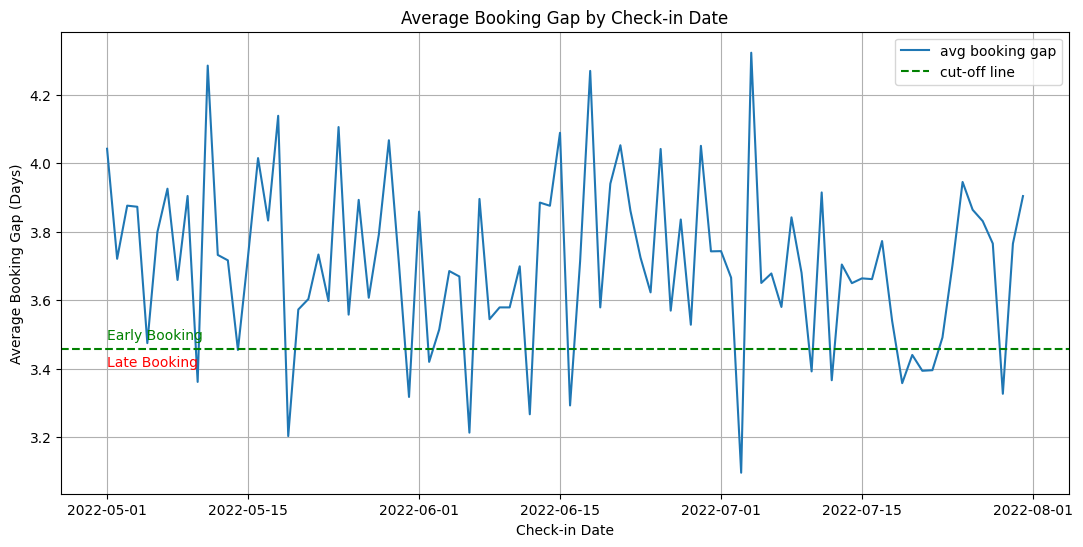

In [ ]:
date_wise_gap = cancel_data.groupby('check_in_date')['booking_gap'].mean()

plt.figure(figsize=(13,6))

plt.plot(date_wise_gap.index , date_wise_gap.values, label='avg booking gap')

cutoff = float(np.round(date_wise_gap.mean() - date_wise_gap.std(),3 ))
# Draw horizontal lines at y=cutoff it works as decision line of late booking or early booking
plt.axhline(y=cutoff, color='g', linestyle='--',label='cut-off line')

# Add text labels for regions
plt.text(date_wise_gap.index[0], cutoff + 0.02, 'Early Booking', verticalalignment='bottom', color='green', fontsize=10)
plt.text(date_wise_gap.index[0], cutoff - 0.02, 'Late Booking', verticalalignment='top', color='red', fontsize=10)

plt.xlabel('Check-in Date')
plt.ylabel('Average Booking Gap (Days)')
plt.title('Average Booking Gap by Check-in Date')
plt.legend()
plt.grid()
plt.show()




### **🔍 Insight from above**:
- Most cancelled bookings were made around **3.5 to 4 days** before check-in.
- The green **cut-off line (~3.45 days)** helps split:
  - 🟢 **Early Bookings** (above the line)
  - 🔴 **Late Bookings** (below the line)
- We can see **many dips below the cut-off**, meaning lots of cancellations happened at the **last minute**.

💡 **Suggestion:** Hotels can reduce revenue loss by applying stricter rules for bookings made <3 days before check-in.

---

###  **Booking Gap Distribution (Box Plot)**

### ✅ What we did:
- Plotted a **boxplot** to show how the number of days between booking and check-in (`booking_gap`) is spread for cancelled bookings.




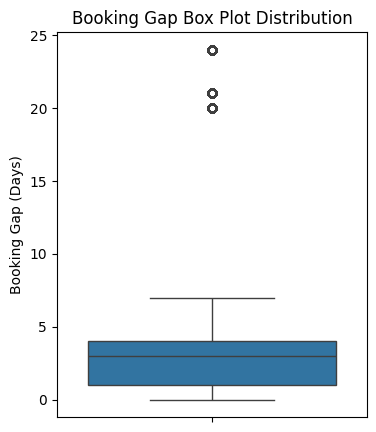

In [ ]:

plt.figure(figsize=(4,5))

sns.boxplot(cancel_data['booking_gap'])

plt.ylabel('Booking Gap (Days)')
plt.title('Booking Gap Box Plot Distribution')
plt.show()

### 🔍**Insights from Box plot:**
- Most cancellations happen around a **short booking gap** (close to 1-3 days).
- There are a few **outliers** with long booking gaps of 20-24 days, but they are rare.
- 📉 This confirms that many cancellations come from **last-minute bookings**.

---

### **📊 Late vs Early Cancelled Bookings - Count Plot**

### ✅ What we did:
- Created a count plot of cancelled bookings labeled as:
  -  **Late** (≤ 2 days before check-in)
  -  **Early** (> 2 days before check-in)


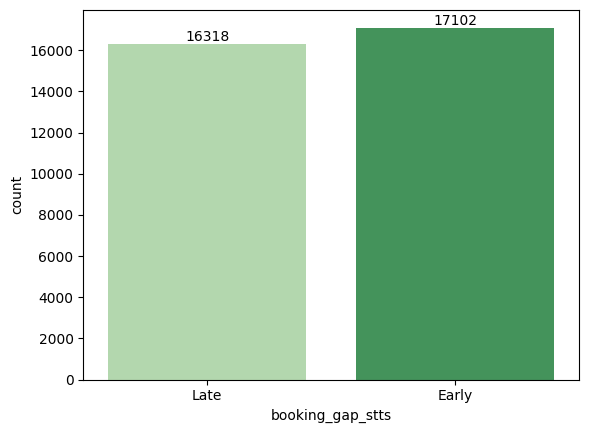

In [ ]:

ax=sns.countplot(x=cancel_data['booking_gap_stts'], palette='Greens')
for con in ax.containers:
  ax.bar_label(con, label_type='edge')
plt.show()

### **🔍 Insight from countplot:**

- Out of all cancelled bookings:
  - **16,318 were Late** (booked within 2 days of check-in)
  - **17,102 were Early**
-  The difference is small, but shows that **late bookings still make up a huge part (~49%)** of total cancellations.
- This confirms that **last-minute bookings are risky** and often lead to cancellation, cause even within 2 days cutoff make over around 49%.

---

## 💡**3.7 Optimize Revenue Leakage by dealing with Late Bookings and Cancellations**

#### We are introducing **Non-Refundable policy** for late booking and cancelation people in order to **minimize the revenue leakage**



### ✅ What We Did:
- We introduced a **Non-Refundable Policy** 💸 for bookings that were **cancelled at the last moment** (called "Late Bookings").
- Idea: If someone books **just 2 days before** check-in and cancels, they will **not get any refund**.
- For this, we created a **new revenue leakage column** where leakage is considered ₹0 if booking was both **cancelled and late**.

```python
# Apply non-refundable rule to 'Late' cancelled bookings
cancel_data["new_rev_leakage"] = np.where(cancel_data['booking_gap_stts'] == 'Late', 0, cancel_data['revenue_leakage'])  
```
- Then we calculated:

  - Old Revenue Leakage → before this policy
  - New Revenue Leakage → after this policy
  - And the percentage reduction in leakage


In [ ]:
# full penalty / Non refund whoever is Late and cancelled
cancel_data["new_rev_leakage"] = np.where(cancel_data['booking_gap_stts'] == 'Late', 0, cancel_data['revenue_leakage'])

#reset_index
cancel_data = cancel_data.reset_index(drop=True)
# comparing old revenue leakage vs new revenue leakage
old_rev_leak = cancel_data['revenue_leakage'].sum()
new_rev_leak = cancel_data['new_rev_leakage'].sum()

reduced_pct = np.round((old_rev_leak - new_rev_leak) / old_rev_leak * 100,2)

print(f"Old Revenue Leakage: ₹{old_rev_leak:,.0f}")
print(f"New Revenue Leakage: ₹{new_rev_leak:,.0f}")
print(f'Revenue Leakage reduced by: {reduced_pct}%')

Old Revenue Leakage: ₹298,774,986
New Revenue Leakage: ₹152,182,680
Revenue Leakage reduced by: 49.06%


### **This bar chart shows before and after optimal policy**

As shown in the chart:

- Old Revenue Leakage: ₹29.8 Cr

- New Revenue Leakage: ₹15.2 Cr

- Revenue Leakage Reduced by 49.06%

This means almost **half of the money loss** due to cancellations can be saved just by applying this simple rule. 💸




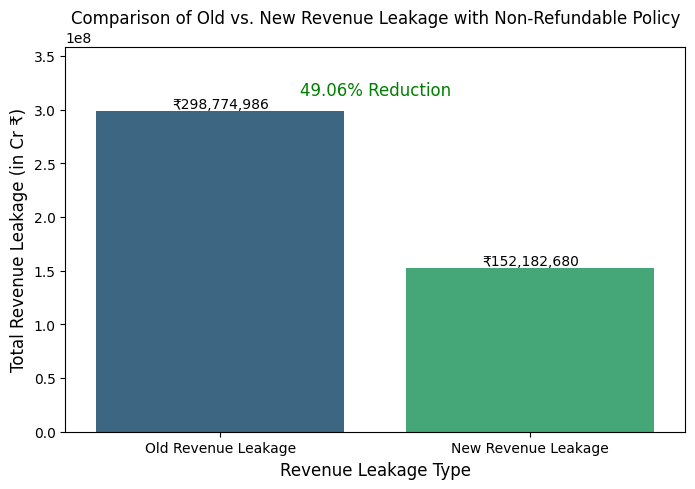

In [ ]:
leakage_values = [old_rev_leak, new_rev_leak]
labels = ['Old Revenue Leakage', 'New Revenue Leakage']

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=labels, y=leakage_values, palette='viridis')

# Add percentage reduction text
plt.text(0.5, max(leakage_values) * 1.05, f'{reduced_pct}% Reduction',
         horizontalalignment='center', fontsize=12, color='green')

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='₹{:,.0f}', label_type='edge', fontsize=10)


plt.xlabel('Revenue Leakage Type',fontsize=12 )
plt.ylabel('Total Revenue Leakage (in Cr ₹)',fontsize=12)
plt.title('Comparison of Old vs. New Revenue Leakage with Non-Refundable Policy')
plt.ylim(0, max(leakage_values) * 1.2)
plt.show()

### **📌 Insight from above:**
- Late cancellations were one of the biggest reasons for revenue loss.
- Although early cancellations are also many (~50%) in number but **applying this policy on late cancellation is justified**
- By not allowing refund for these late cancellations, hotels **can protect their revenue.**

This policy is easy to apply and can **save ₹14.6 Cr+ (~49%)** in just one season !  

---

In [ ]:
# converted to csv file
cancel_data.to_csv('Generated_cancelled_data.csv',index=False)

In [ ]:
#Get access next time after runnout

cancel_data = pd.read_csv( "/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/My_data/Generated_cancelled_data.csv")

cancel_data['booking_date'] = pd.to_datetime(cancel_data['booking_date'])
cancel_data['check_in_date'] = pd.to_datetime(cancel_data['check_in_date'])
cancel_data['checkout_date'] = pd.to_datetime(cancel_data['checkout_date'])

## 📑**3.7 Assesment of customer reviews and trend**  

### This bar plot shows overall counts of ratings given

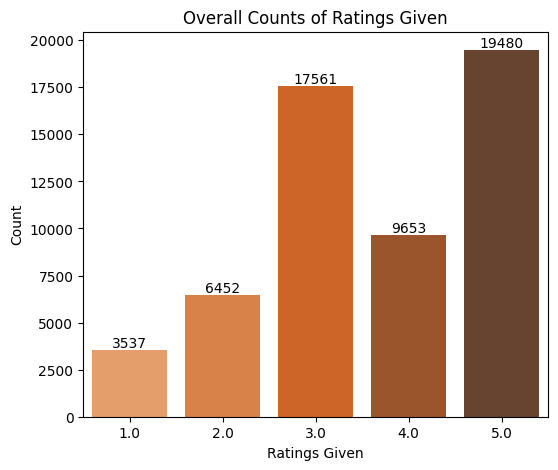

Average ratings are:


3.62

In [ ]:
# extracted dataframe with ratings
df_rating = df[df['ratings_given'].notna()]

plt.figure(figsize=(6, 5))

ax=sns.countplot(x=df_rating['ratings_given'], palette="Oranges_d")
for con in ax.containers:
  ax.bar_label(con, label_type='edge')

plt.xlabel('Ratings Given')
plt.ylabel('Count')
plt.title('Overall Counts of Ratings Given')
plt.show()

print("Average ratings are:")
float(np.round(df_rating['ratings_given'].mean(),2 ))

### Insights from above:

- Most ratings are 5★(19480) and then 3★(17561) followed by 4,2 and 1.
- average ratings are around 3.62 which is not so good.

---

## **📌 Customer Satisfaction Analysis (Based on Ratings)**

### ✅ What we did:
- We took only the rows where customers gave **ratings** (not null).
- Grouped data by `property_name` and `ratings_given` to count how many people gave each type of rating (1★ to 5★).
- Also calculated **average rating** for each property by groupedby with `property_name` .  
- Then we made a **combo plot**:
  - Bar plot → shows rating count per property.
  - Line plot → shows average rating per property.
  - We used `twinx()` to plot both on same graph (dual Y-axis).




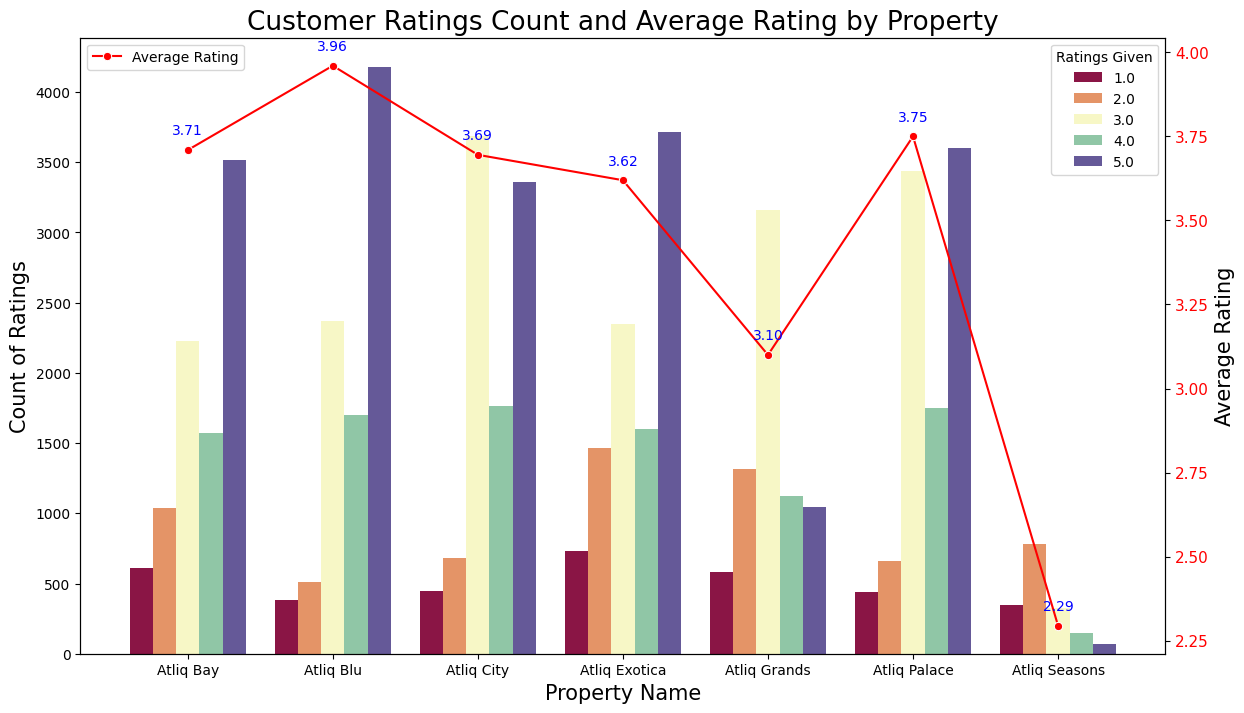

In [ ]:
# total counts of each rating for each property
rating_cnt_property  = df[df['ratings_given'].notna()].groupby(['property_name','ratings_given'])['booking_id'].count()
rating_cnt_property = rating_cnt_property.reset_index()
rating_cnt_property.rename(columns={'booking_id': 'counts'}, inplace=True)

# avg ratings property wise
avg_rating_property = df[df['ratings_given'].notna()].groupby('property_name')['ratings_given'].mean().sort_values()
avg_rating_property = avg_rating_property.reset_index()

#--------------------------------------------------Let's plot bar

plt.figure(figsize=(14,8))

# bar plot for rating counts
sns.barplot(data=rating_cnt_property, x='property_name', y='counts',hue='ratings_given', palette='Spectral' )
plt.ylabel("Count of Ratings", fontsize=15)
plt.xlabel("Property Name",fontsize=15)
plt.title("Customer Ratings Count and Average Rating by Property",fontsize=19)

# Add legend for the bar plot
plt.legend(title='Ratings Given', loc='upper right')

#------------------------------------------------------ Next plot with secondary y axis

# Create a secondary y-axis for the line plot
ax2 = plt.gca().twinx()

# Line plot for average ratings
line = sns.lineplot(data=avg_rating_property, x='property_name', y='ratings_given', color='r', marker='o', ax=ax2, label='Average Rating')

# Annotate the average ratings on the line markers
for x, y in zip(avg_rating_property['property_name'], avg_rating_property['ratings_given']):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,11), ha='center', color='b')


ax2.set_ylabel("Average Rating",fontsize=15)
ax2.tick_params(axis='y', labelcolor='r',labelsize=11)


# Add legend for the line plot
ax2.legend(loc='upper left')

plt.show()



### **📊 Insights from above:**
-  **Atliq Seasons** got **lowest average rating** (~2.2). Most people gave 1 or 2 stars → this property needs urgent improvement.
-  **Atliq Blu** and **Atliq Bay** have **high avg ratings**(3.96 & 3.71) and more 5-star votes → these are performing well.
-  **Atliq Grands** and **Atliq Exotica** are decent, but have good number of low ratings too → they need service improvement.
-  Many 3★ ratings seen for all hotels → means people are **not very happy, but not too upset also**.



#### 📎 Note:
This chart is useful to **track customer experience property-wise**.

---

### **📌 Customer Ratings Analysis (Platform-wise)**

#### ✅ What we did:
- We selected only the rows where ratings are **not null** (valid ratings).
- Then we counted how many people gave each rating (1★ to 5★) for every `booking_platform`.
- Also calculated **average rating** for each platform.
- Finally plotted:  
  -  Bar plot to show **how many people** gave each rating on each platform.
  - Line plot (on secondary y-axis) to show **average rating** platform-wise.



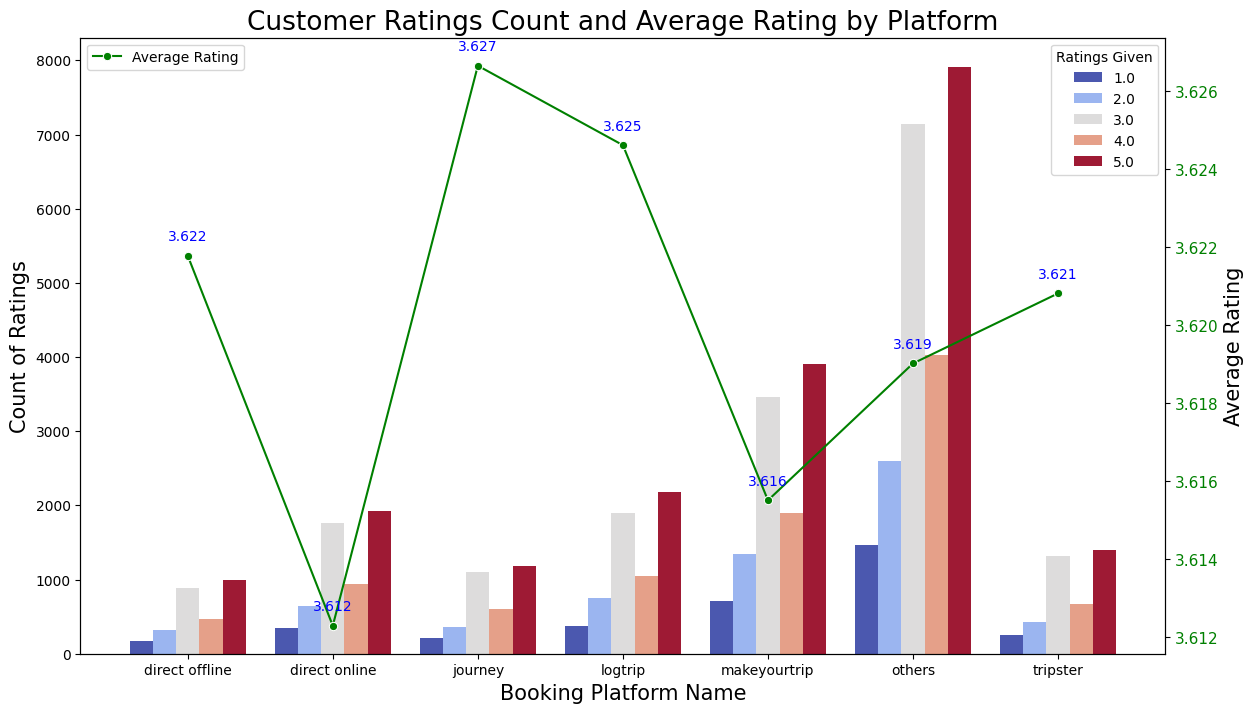

In [ ]:
# total counts of each rating for each  platform
rating_cnt_platform = df[df['ratings_given'].notna()].groupby(['booking_platform','ratings_given'])['booking_id'].count()
rating_cnt_platform = rating_cnt_platform.reset_index()
rating_cnt_platform.rename(columns={'booking_id': 'counts'}, inplace=True)
rating_cnt_platform

# avg ratings platform wise
avg_rating_platform = df[df['ratings_given'].notna()].groupby('booking_platform')['ratings_given'].mean().sort_values()
avg_rating_platform = avg_rating_platform.reset_index()
avg_rating_platform

#--------------------------------------------------Let's plot

plt.figure(figsize=(14,8))

# bar plot for rating counts
sns.barplot(data=rating_cnt_platform, x='booking_platform', y='counts',hue='ratings_given', palette='coolwarm' )
plt.ylabel("Count of Ratings", fontsize=15)
plt.xlabel("Booking Platform Name",fontsize=15)
plt.title("Customer Ratings Count and Average Rating by Platform",fontsize=19)

# Add legend for the bar plot
plt.legend(title='Ratings Given', loc='upper right')

#------------------------------------------------------ Next plot with secondary y axis

# Create a secondary y-axis for the line plot
ax2 = plt.gca().twinx()

# Line plot for average ratings
line = sns.lineplot(data=avg_rating_platform, x='booking_platform', y='ratings_given', color='g', marker='o', ax=ax2, label='Average Rating')

# Annotate the average ratings on the line markers
for x, y in zip(avg_rating_platform['booking_platform'], avg_rating_platform['ratings_given']):
    ax2.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(0,11), ha='center', color='b')


ax2.set_ylabel("Average Rating",fontsize=15)
ax2.tick_params(axis='y', labelcolor='g',labelsize=11)


# Add legend for the line plot
ax2.legend(loc='upper left')

plt.show()




### **📊 Insights from the above Plot:**
- All platforms got **similar average ratings** (~3.61 to 3.63), which means **customer satisfaction is mostly same** across platforms.
-  **Direct Online** has slightly lower avg rating (~3.612) → maybe customers are facing issues on this platform.
-  **Journey** and **Logtrip** got better 4★ and 5★ counts → these platforms are doing a bit better in ratings.
-  **Others** has highest total ratings (big bar sizes) → it's used more.
- Overall, we can say ratings are equal across all booking platform. But that rating is not that much good (< 4★).

---



### **📌 Customer Ratings Analysis (Platform-wise)**  

- This Bar plot to shows **average rating** recieved by **each room categroy**


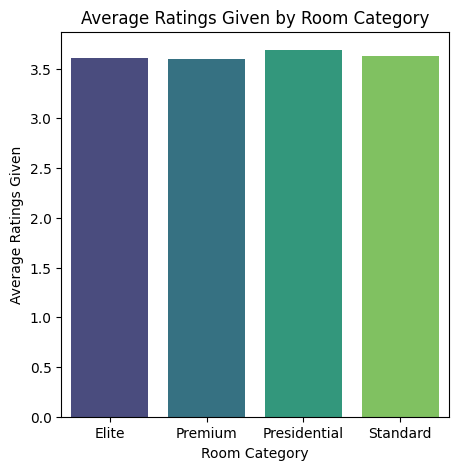

In [ ]:
avg_rating_room = df[df['ratings_given'].notna()].groupby(["room_category"])['ratings_given'].mean()
avg_rating_room  = avg_rating_room .reset_index()
avg_rating_room.rename(columns={'ratings_given': 'avg_ratings_given'}, inplace=True)

plt.figure(figsize=(5,5))
sns.barplot(data=avg_rating_room ,x='room_category', y='avg_ratings_given', palette='viridis')
plt.xlabel("Room Category")
plt.ylabel("Average Ratings Given")
plt.title("Average Ratings Given by Room Category")
plt.show()

##🔍 **Insights from all above customer review analysis**
- Again almost **Room wise** ratings are almost same not so varied.
- For almost everything small variations in average customer rating (staying around 3.6 to 3.7).
-But **property-wise ratings** show a **wider gap (from 2.2 to 4.0)**.
That's actually very important and gives us a clear direction to act.

## What Hotels Can Do Now (Based on Insights)?

🔍 **1. Focus on Property-Level Service:**

- Since **property name** is the only factor where **rating varies significantly**,

- It clearly shows some properties are doing well, while some are pulling down the overall ratings.

- **📌 Action:**

  - Do internal quality audits for low-rated properties.

  - Talk to staff, check facilities, food, hygiene, etc.

  - Use **High-Rated** Properties as **Models**.
  

In [ ]:
# if you again want to load the finally perpared dataset from your drive or whatever, do perform this code snippet

# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/My_data/final_data_frame.csv')

# df['check_in_date'] = pd.to_datetime(df['check_in_date'])
# df['checkout_date'] = pd.to_datetime(df['checkout_date'])
# df['booking_date'] = pd.to_datetime(df['booking_date'])

In [ ]:
# if you again want to load the KPI data

# KPI = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IIT G, summer analytics/My_data/KPI_data.csv")

# KPI['check_in_date'] = pd.to_datetime(KPI['check_in_date'])

In [ ]:
KPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
 5   occupancy_pct        9200 non-null   float64       
 6   revenue_realized     9200 non-null   int64         
 7   RevPAR               9200 non-null   float64       
 8   ADR                  9200 non-null   float64       
 9   week no              9200 non-null   int64         
 10  day_type             9200 non-null   object        
 11  property_name        9200 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 862.6+ KB


# **Step 4: Week on week Growth:**
## 4.1 Calculate weekly occupancy % and average ratings**
- Step: Plot occupancy % vs average rating
- Occupancy on left y-axis (blue), Rating on right y-axis (red)
- Filled area + line for both, with annotations   

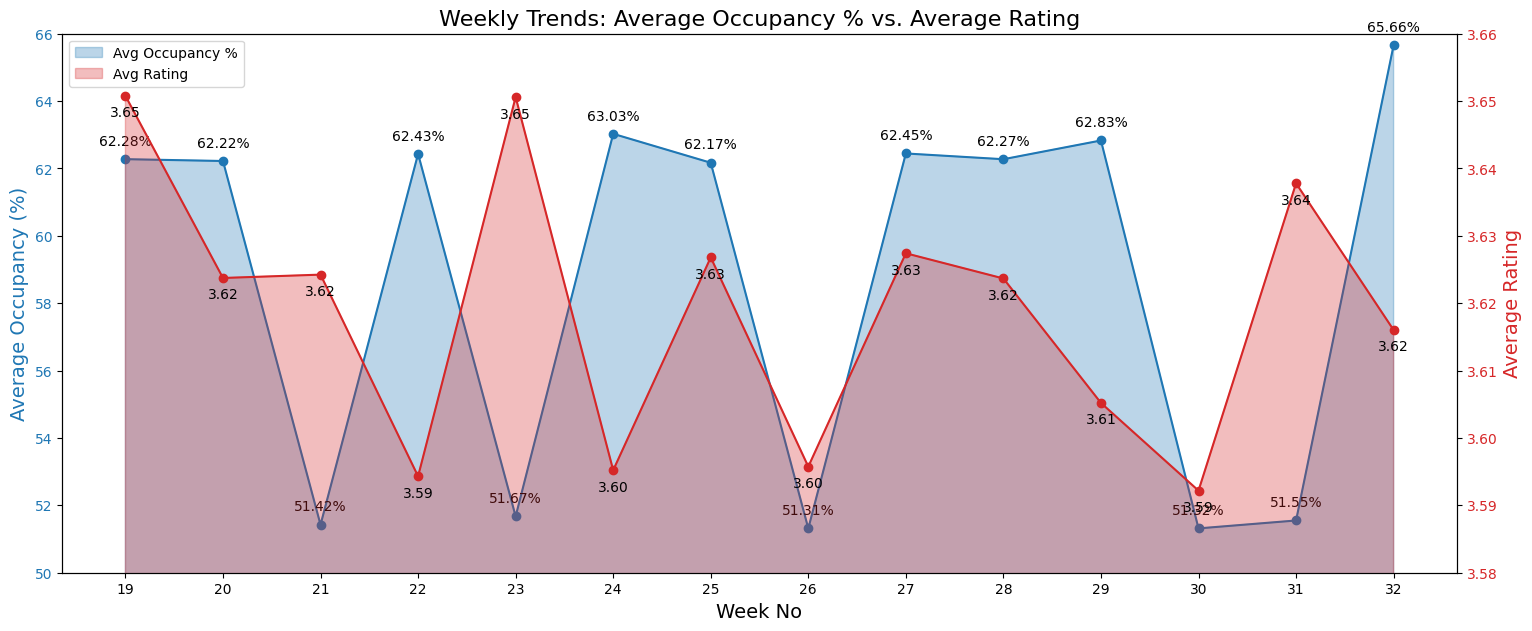

In [ ]:
# Week vs Avg Rating vs Occupancy
W_occ = KPI.groupby('week no')['occupancy_pct'].mean()
W_rating = df[df['ratings_given'].notna()].groupby('week no')['ratings_given'].mean()

fig, ax1 = plt.subplots(figsize=(18, 7))

# Plot occupancy percentage as an area plot with low-medium alpha
ax1.fill_between(W_occ.index, W_occ.values, color='tab:blue', alpha=0.3, label='Avg Occupancy %')
ax1.plot(W_occ.index, W_occ.values, color='tab:blue', marker='o') # Keep the line for clarity
ax1.set_xlabel('Week No', fontsize=14)
ax1.set_ylabel('Average Occupancy (%)', color='tab:blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax1.set_ylim(50, 66) # Set left y-axis scale

# Create a secondary y-axis for average rating
ax2 = ax1.twinx()
# Plot average rating as an area plot with low-medium alpha
ax2.fill_between(W_rating.index, W_rating.values, color='tab:red', alpha=0.3, label='Avg Rating')
ax2.plot(W_rating.index, W_rating.values, color='tab:red', marker='o') # Keep the line for clarity
ax2.set_ylabel('Average Rating', color='tab:red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(3.58, 3.66) # Set right y-axis scale

# Add annotations
for x, y in zip(W_occ.index, W_occ.values):
    ax1.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='black')
for x, y in zip(W_rating.index, W_rating.values):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, -15), ha='center', color='black')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Weekly Trends: Average Occupancy % vs. Average Rating', fontsize=16)

plt.xticks(range(19,33))
plt.show()


### **🔍 Insights from the above plot:**

- So in the analysis of hotels occupancy fluctuates week to week — **dips in weeks 21, 23, 26, 30** with recovery afterward.

- **Average Ratings** stay very consistent **(between 3.59 to 3.65)** across all weeks (19 to 32) — even when occupancy is **low or high.**
                          

- **Week 32** shows a **high occupancy rate of 65.6%**, indicating high demand.

- **Week 26** and **week 31** see lower occupancy rates at **around ~51%.**

- **Week 23** shines with a high average rating of **3.65**,

- while **week 22** and **week 30** show slightly **lower ratings at 3.59**.


🧠 Hotels can improve service experience across weeks, not just focus on occupancy campaigns.

## **4.2 Group data week-wise for ADR and RevPAR**

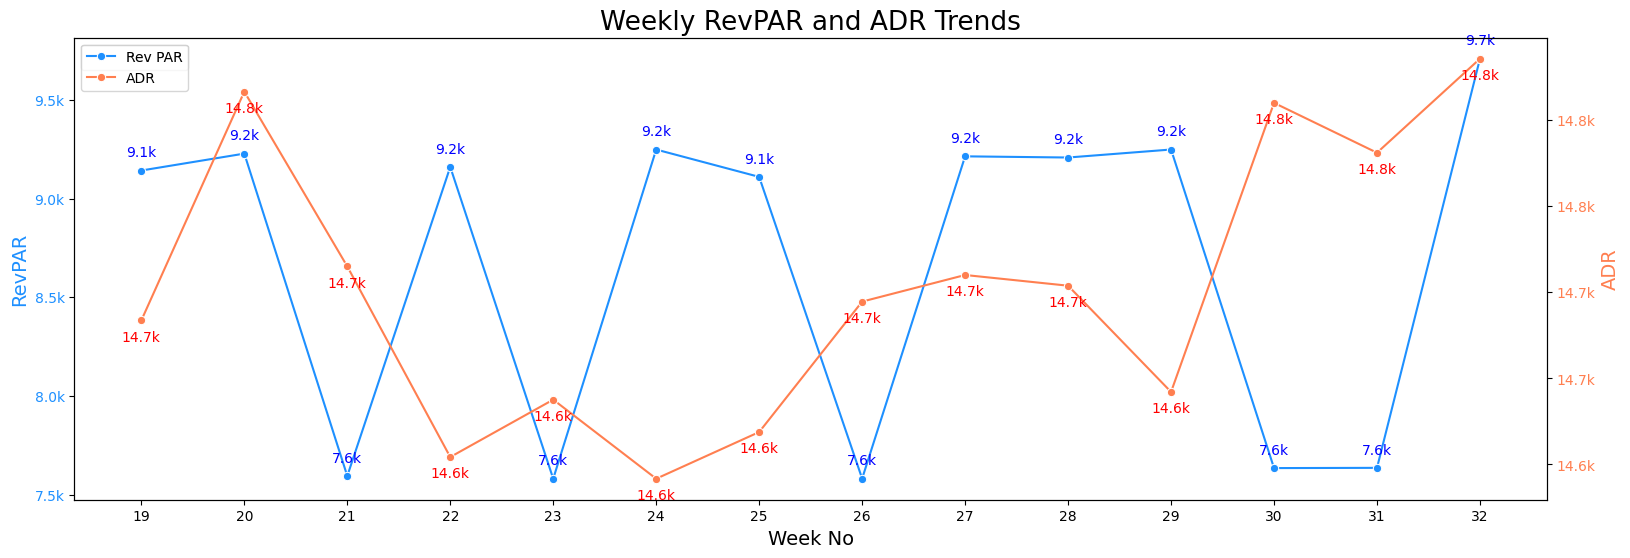

In [ ]:
# week vs ADR vs RevPAR
week_ADR_RevPAR = KPI.groupby('week no').agg({'ADR':'mean','RevPAR':'mean'}).reset_index()

import matplotlib.ticker as mtick

fig, ax1 = plt.subplots(figsize=(19, 6))
# Plot RevPAR on primary y-axis
sns.lineplot(data=week_ADR_RevPAR, x='week no', y='RevPAR', ax=ax1, label='Rev PAR', color='dodgerblue', marker='o') # Added marker
ax1.set_xlabel('Week No',fontsize=14)
ax1.set_ylabel('RevPAR', color='dodgerblue',fontsize=14)
ax1.tick_params(axis='y', labelcolor='dodgerblue')


# Create a secondary y-axis for ADR
ax2 = ax1.twinx()
sns.lineplot(data=week_ADR_RevPAR, x='week no', y='ADR', ax=ax2, label='ADR', color='coral', marker='o') # Added marker
ax2.set_ylabel('ADR', color='coral', fontsize=14)
ax2.tick_params(axis='y', labelcolor='coral')

# Format y-axis labels in K format
formatter = mtick.FuncFormatter(lambda x, _: f'{x/1000:.1f}k')
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

# Add annotations for each point with K format
for x, y in zip(week_ADR_RevPAR['week no'], week_ADR_RevPAR['RevPAR']):
    ax1.annotate(f'{y/1000:.1f}k', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

for x, y in zip(week_ADR_RevPAR['week no'], week_ADR_RevPAR['ADR']):
    ax2.annotate(f'{y/1000:.1f}k', (x, y), textcoords="offset points", xytext=(0,-15), ha='center', color='red')


# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Weekly RevPAR and ADR Trends',fontsize=19)
plt.xticks(range(19,33))
plt.show()


### **🔍Insights from the above graph:**
- **RevPAR (Revenue per Available Room)** shows fluctuations across weeks, **Dips in week 21, 23, 26, 30, 31.** arpund ₹7.6k

- **Week 32** shows sharp jump — **RevPAR hit ₹9.7k**, possibly due to **high occupancy.**

- **ADR (Average Daily Rate)** remains relatively stable between **₹14.6k - ₹14.8k**.

- This means room pricing didn't vary much, but RevPAR changed with occupancy.

### 🧠 Hotels can focus on:

- Filling up rooms more consistently in low-performing weeks to improve RevPAR.

- Use this pattern for dynamic pricing strategy — maintain ADR, boost RevPAR .

 ## **💰 4.3 Revenue split by time period (weekly)**

### What we did?
- we grouped the `week no` from df and computed it's total **`revenue_realized`**

- This bar plot shows period wise **week on week revenue earned**

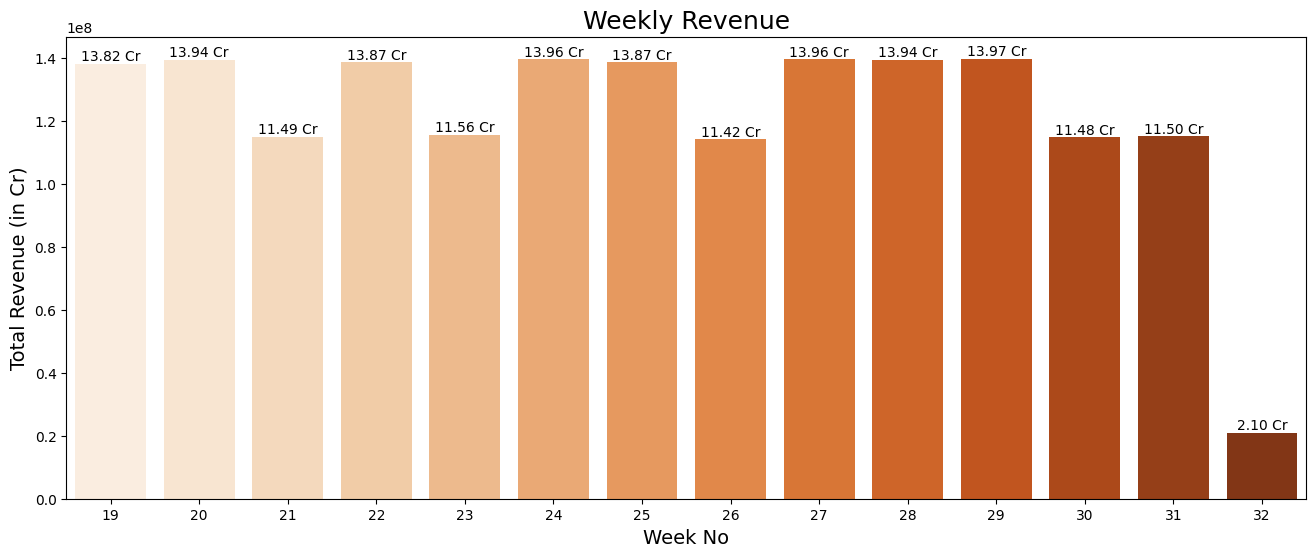

In [ ]:

weekly_rev = df.groupby('week no')['revenue_realized'].sum()

plt.figure(figsize=(16,6))

ax = sns.barplot( x=weekly_rev.index, y=weekly_rev.values, palette='Oranges' )

for con in ax.containers:
  labels = [f'{v.get_height()/10000000:.2f} Cr' for v in con]
  ax.bar_label(con, labels=labels, label_type='edge', fontsize=10)

plt.xlabel("Week No", fontsize=14)
plt.ylabel("Total Revenue (in Cr)", fontsize=14)
plt.title("Weekly Revenue", fontsize=18)

plt.show()

### **Insights from above**
- **week 20, 27, 28, 29** are the highest revenue earned week **( more than 13.9 Cr)**   
- **Week 19, 22, 27** are also in better zone **(13.82 Cr - 13.87 Cr)**
- **Week 21, 23, 26, 30, 31** showed decent performence **(11,49 Cr - 11.56 Cr)**
- Week 32 showed drastically poor performence at 2.1 Cr